<a href="https://colab.research.google.com/github/cirilwakounig/TokenisationThesis/blob/main/Optimisation_Model_STDEV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Introduction**


---



In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


!pip install numpy_financial
import numpy_financial as npf

from pandas.plotting import scatter_matrix
from scipy.stats import norm

import seaborn as sns
from matplotlib.ticker import StrMethodFormatter

from matplotlib.patches import ConnectionPatch
import matplotlib.patches as patches

## Risk-Return Analysis

---

In this section, the risk-return profile of technologies is shown.

In [ ]:
#gas_results = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Thesis/Mean-Variance Analysis/Data/Results/gas_results.csv")
#bio_results = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Thesis/Mean-Variance Analysis/Data/Results/bio_results.csv")
#wind_results = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Thesis/Mean-Variance Analysis/Data/Results/wind_results.csv")
#solar_results = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Thesis/Mean-Variance Analysis/Data/Results/solar_results.csv")

In [ ]:
gas_results = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Thesis/Mean-Variance Analysis/Data/Results/STDEV/gas_MC_results_stdev.csv")
bio_results = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Thesis/Mean-Variance Analysis/Data/Results/STDEV/bio_MC_results_stdev.csv")
wind_results = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Thesis/Mean-Variance Analysis/Data/Results/STDEV/wind_MC_results_stdev.csv")
solar_results = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Thesis/Mean-Variance Analysis/Data/Results/STDEV/solar_MC_results_stdev.csv")

In [ ]:
IRR_results = pd.concat([gas_results["Project IRR"], bio_results["Project IRR"], wind_results["Project IRR"], solar_results["Project IRR"]], axis = 1)
IRR_results.columns = ["Gas IRR", "Bio IRR", "Wind IRR", "Solar IRR"]


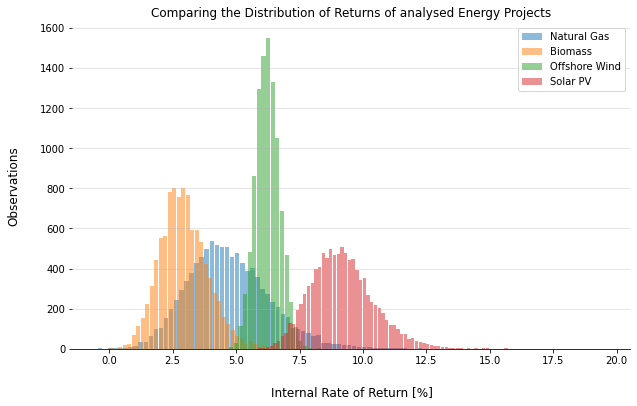

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))
ax.hist(IRR_results["Gas IRR"], bins = 100, alpha = 0.5, rwidth = 0.9, label = "Natural Gas")
ax.hist(IRR_results["Bio IRR"], bins = 40, alpha = 0.5,rwidth = 0.9, label = "Biomass")
ax.hist(IRR_results["Wind IRR"], bins = 20, alpha = 0.5,rwidth = 0.9, label = "Offshore Wind")
ax.hist(IRR_results["Solar IRR"], bins = 80, alpha = 0.5,rwidth = 0.9, label = "Solar PV")

ax.grid(axis = "y", alpha = 0.4)
ax.set_title("Comparing the Distribution of Returns of analysed Energy Projects")
# Set x-axis label
ax.set_xlabel("Internal Rate of Return [%]", labelpad=20,size=12)

# Set y-axis label
ax.set_ylabel("Observations", labelpad=20, size=12)
ax.legend()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.savefig("/content/drive/MyDrive/Colab Notebooks/Thesis/Mean-Variance Analysis/Figures/IRR_Consolidated.png", dpi = 300, bbox_inches='tight')

#### Data Visualisation

---

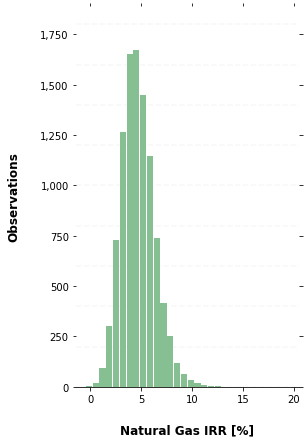

In [ ]:
IRR_results = pd.concat([gas_results["Project IRR"], bio_results["Project IRR"], wind_results["Project IRR"], solar_results["Project IRR"]], axis = 1)
IRR_results.columns = ["Gas IRR", "Bio IRR", "Wind IRR", "Solar IRR"]


ax = IRR_results.hist(column=['Gas IRR'], bins=30, grid=False, figsize=(4,7), color='#86bf91', zorder=2, rwidth=0.9)
ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("Natural Gas IRR [%]", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Observations", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

plt.savefig("/content/drive/MyDrive/Colab Notebooks/Thesis/Mean-Variance Analysis/Figures/IRR_Gas.png", dpi = 300, bbox_inches='tight')

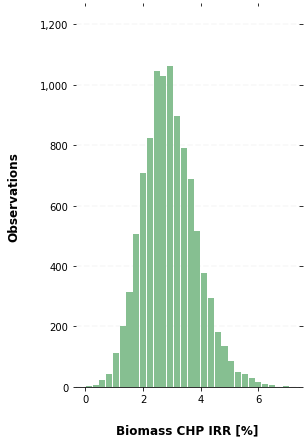

In [ ]:
# Biomass
ax2 = IRR_results.hist(column=['Bio IRR'], bins=30, grid=False, figsize=(4,7), color='#86bf91', zorder=2, rwidth=0.9)
ax2 = ax2[0]
for x in ax2:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("Biomass CHP IRR [%]", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Observations", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

plt.savefig("/content/drive/MyDrive/Colab Notebooks/Thesis/Mean-Variance Analysis/Figures/IRR_Bio.png", dpi = 300, bbox_inches='tight')

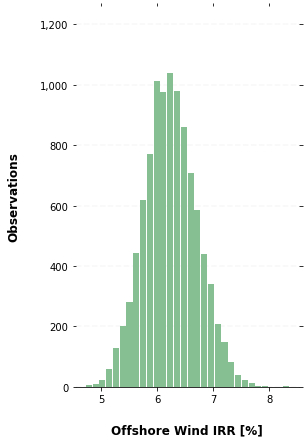

In [ ]:
# Biomass
ax3 = IRR_results.hist(column=['Wind IRR'], bins=30, grid=False, figsize=(4,7), color='#86bf91', zorder=2, rwidth=0.9)
ax3 = ax3[0]
for x in ax3:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("Offshore Wind IRR [%]", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Observations", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

plt.savefig("/content/drive/MyDrive/Colab Notebooks/Thesis/Mean-Variance Analysis/Figures/IRR_Wind.png", dpi = 300, bbox_inches='tight')

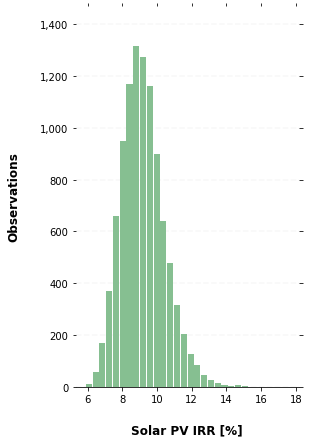

In [ ]:
# Solar
ax4 = IRR_results.hist(column=['Solar IRR'], bins=30, grid=False, figsize=(4,7), color='#86bf91', zorder=2, rwidth=0.9)
ax4 = ax4[0]
for x in ax4:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("Solar PV IRR [%]", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Observations", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

plt.savefig("/content/drive/MyDrive/Colab Notebooks/Thesis/Mean-Variance Analysis/Figures/IRR_Solar.png", dpi = 300, bbox_inches='tight')

In [ ]:
IRR_results.describe()

,Gas IRR,Bio IRR,Wind IRR,Solar IRR
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.709808,2.929077,6.240563,9.189453
std,1.629377,0.927368,0.467063,1.243894
min,-0.460000,0.000000,4.720000,5.870000
25%,3.587500,2.300000,5.920000,8.310000
50%,4.570000,2.870000,6.230000,9.100000
75%,5.700000,3.510000,6.550000,9.930000
max,19.550000,7.070000,8.350000,17.610000


In [ ]:
IRR_results.describe().iloc[2,:]/IRR_results.describe().iloc[1,:]

Gas IRR      0.345954
Bio IRR      0.316608
Wind IRR     0.074843
Solar IRR    0.135361
dtype: float64

#### Consolidated Risk-Return Results

---

In [ ]:
######################## Results

# Gas
gas_mean = gas_results.describe()["Project IRR"][1]
gas_std = gas_results.describe()["Project IRR"][2]

# Bio
bio_mean = bio_results.describe()["Project IRR"][1]
bio_std = bio_results.describe()["Project IRR"][2]

# Wind
wind_mean = wind_results.describe()["Project IRR"][1]
wind_std = wind_results.describe()["Project IRR"][2]

# Solar
solar_mean = solar_results.describe()["Project IRR"][1]
solar_std = solar_results.describe()["Project IRR"][2]

In [ ]:
# Consolidated Results DataFrame
returns = pd.DataFrame(data = [[gas_mean, bio_mean, wind_mean, solar_mean]], columns = ["Gas", "Bio", "Wind", "Solar"])
returns

,Gas,Bio,Wind,Solar
0,4.709808,2.929077,6.240563,9.189453


In [ ]:
# Consolidated Deviations DataFrame
deviations = pd.DataFrame(data = [[gas_std, bio_std, wind_std, solar_std]], columns = ["Gas", "Bio", "Wind", "Solar"])
deviations

,Gas,Bio,Wind,Solar
0,1.629377,0.927368,0.467063,1.243894


In [ ]:
asset_sharpe = (returns - 0.7)/deviations

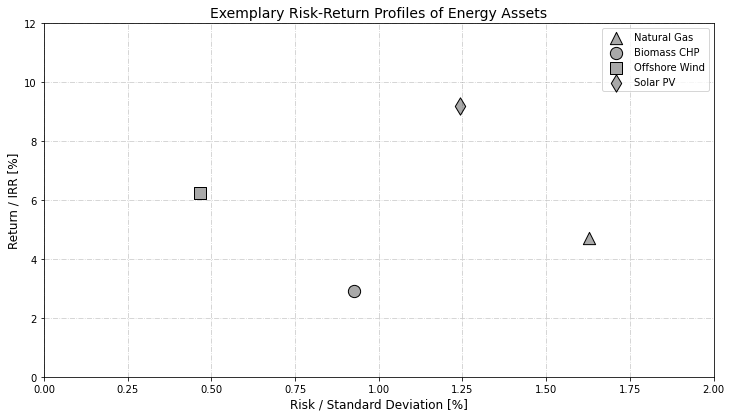

In [ ]:
plt.figure(figsize = (12,6.5))
marker_size = 150
plt.scatter(gas_std, gas_mean, facecolors = "darkgrey", edgecolors = "black", s = marker_size, marker = "^", label = "Natural Gas")
plt.scatter(bio_std, bio_mean, facecolors = "darkgrey", edgecolors = "black", s = marker_size, marker = "o", label = "Biomass CHP")
plt.scatter(wind_std, wind_mean, facecolors = "darkgrey", edgecolors = "black", s = marker_size, marker = "s", label = "Offshore Wind")
plt.scatter(solar_std, solar_mean, facecolors = "darkgrey", edgecolors = "black", s = marker_size, marker = "d", label = "Solar PV")
plt.grid(color = "black", alpha = 0.2, linestyle = "-.")


# Labels
plt.title("Exemplary Risk-Return Profiles of Energy Assets", size = 14)
plt.legend()
plt.xlabel("Risk / Standard Deviation [%]", size = 12)
plt.ylabel("Return / IRR [%]", size = 12)
plt.xlim((0,2))
plt.ylim((0,12))

plt.savefig("/content/drive/MyDrive/Colab Notebooks/Thesis/Mean-Variance Analysis/Figures/Example_Asset_Profiles.png", dpi = 300, bbox_inches='tight')

#### Correlation of Returns

---

In this section, the correlation of returns is calculated.



In [ ]:
# Obtain the Correlation Coefficient of Each Asset
rho = IRR_results.corr(method='pearson')
#rho = rho+0.1
#for i in range(len(rho)):
  #rho.iloc[i,i] = 1

#rho.to_csv("/content/drive/MyDrive/Colab Notebooks/Thesis/Mean-Variance Analysis/Data/Processed/rho_old.csv", index = False)
rho

,Gas IRR,Bio IRR,Wind IRR,Solar IRR
Gas IRR,1.000000,-0.005573,0.004980,-0.011752
Bio IRR,-0.005573,1.000000,0.010908,-0.008285
Wind IRR,0.004980,0.010908,1.000000,-0.002571
Solar IRR,-0.011752,-0.008285,-0.002571,1.000000


In [ ]:
#rho = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Thesis/Mean-Variance Analysis/Data/Processed/rho_old.csv")
#rho

In [ ]:
IRR_results.std()

Gas IRR      1.629377
Bio IRR      0.927368
Wind IRR     0.467063
Solar IRR    1.243894
dtype: float64

In [ ]:
# Obtain the standard deviation of each asset
sigma = deviations
sigma.columns = IRR_results.columns
sigma

,Gas IRR,Bio IRR,Wind IRR,Solar IRR
0,1.629377,0.927368,0.467063,1.243894


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f288617e710>,
      dtype=object)

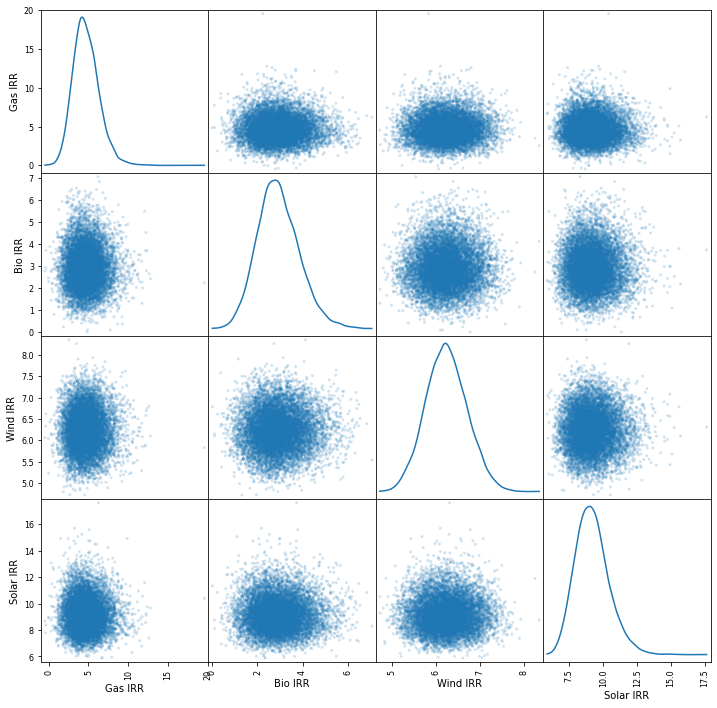

In [ ]:
scatter_matrix(IRR_results, alpha=0.2, figsize=(12, 12), diagonal='kde')

## Portfolio Optimisation

--- 

In this section, non-linear programming is used to assess the optimised.

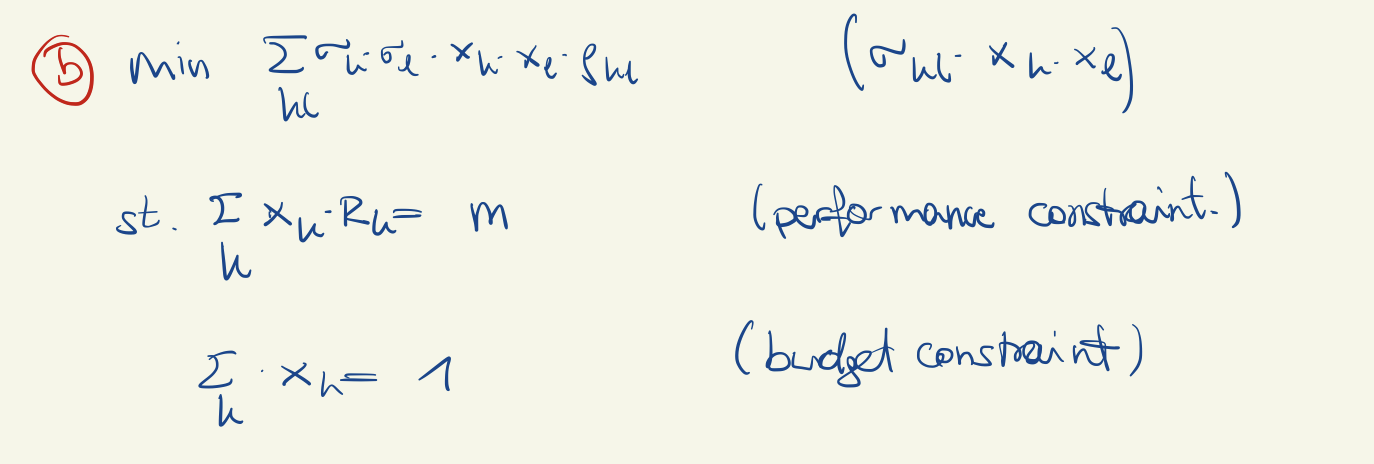

In [ ]:
%%capture

!pip install pyomo
from pyomo.environ import *


# !apt-get install -y -qq glpk-utils     # for glpk

!wget -N -q "https://ampl.com/dl/open/ipopt/ipopt-linux64.zip"
!unzip -o -q ipopt-linux64

### Initial Portfolio

---

In [ ]:
risk_free = 0.7

In [ ]:
no_technologies = returns.shape[1]

for i in range(no_technologies):
  print(rho.iloc[0,i])

1.0
-0.00557323588027866
0.00498024526359865
-0.01175188667462124


In [ ]:
# Initial Portfolio is made up for 4 assets with equal allocation. 

# Initial Allocation
no_technologies = returns.shape[1]
x_initial = [0.0698, 0.2326, 0.6628, 0.0349]

#################### Initial Return
initial_return = 0
for i in range(no_technologies):
  print("Technology", i+1,":",returns.iloc[0,i])
  initial_return = initial_return + x_initial[i]*returns.iloc[0,i]


#################### Initial Risk
initial_risk = 0
for i in range(no_technologies):
  for j in range(no_technologies):
    initial_risk = initial_risk + (x_initial[i]*x_initial[j])*sigma.iloc[0,i]*sigma.iloc[0,j]*rho.iloc[i,j]

initial_risk = np.sqrt(initial_risk)
print("Initial Return:",initial_return)
print("Initial Risk:", initial_risk)
#initial_return
#initial_mean
initial_sharpe = (initial_return - risk_free)/initial_risk


results_columns = ["Sharpe","Return", "Risk", "Gas Share", "Bio Share", "Wind Share", "Solar Share"]
initial_portfolio = pd.DataFrame(data = [[initial_sharpe, initial_return, initial_risk, x_initial[0], x_initial[1], x_initial[2], x_initial[3]]], columns = results_columns)
initial_portfolio


Technology 1 : 4.709808000000004
Technology 2 : 2.929077
Technology 3 : 6.240563000000022
Technology 4 : 9.189452999999949
Initial Return: 5.4670049747000125
Initial Risk: 0.39796387519346427


,Sharpe,Return,Risk,Gas Share,Bio Share,Wind Share,Solar Share
0,11.978487,5.467005,0.397964,0.0698,0.2326,0.6628,0.0349


In [ ]:
# Initial Portfolio is made up for 4 assets with equal allocation. 

# Initial Allocation
no_technologies = returns.shape[1]
x_initial = 1/no_technologies

#################### Initial Return
initial_return = 0
for i in range(no_technologies):
  print("Technology", i+1,":",returns.iloc[0,i])
  initial_return = initial_return + x_initial*returns.iloc[0,i]


#################### Initial Risk
initial_risk = 0
for i in range(no_technologies):
  for j in range(no_technologies):
    initial_risk = initial_risk + (x_initial**2)*sigma.iloc[0,i]*sigma.iloc[0,j]*rho.iloc[i,j]

initial_risk = np.sqrt(initial_risk)
print("Initial Return:",initial_return)
print("Initial Risk:", initial_risk)
#initial_return
#initial_mean
initial_sharpe = (initial_return - risk_free)/initial_risk


results_columns = ["Sharpe","Return", "Risk", "Gas Share", "Bio Share", "Wind Share", "Solar Share"]
initial_portfolio = pd.DataFrame(data = [[initial_sharpe, initial_return, initial_risk, x_initial, x_initial, x_initial, x_initial]], columns = results_columns)
initial_portfolio


Technology 1 : 4.709808000000004
Technology 2 : 2.929077
Technology 3 : 6.240563000000022
Technology 4 : 9.189452999999949
Initial Return: 5.767225249999994
Initial Risk: 0.5706765303634531


,Sharpe,Return,Risk,Gas Share,Bio Share,Wind Share,Solar Share
0,8.87933,5.767225,0.570677,0.25,0.25,0.25,0.25


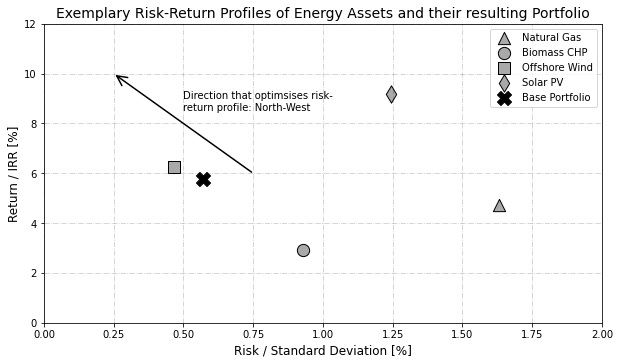

In [ ]:
plt.figure(figsize = (10,5.5))
marker_size = 150
plt.scatter(gas_std, gas_mean, facecolors = "darkgrey", edgecolors = "black", s = marker_size, marker = "^", label = "Natural Gas")
plt.scatter(bio_std, bio_mean, facecolors = "darkgrey", edgecolors = "black", s = marker_size, marker = "o", label = "Biomass CHP")
plt.scatter(wind_std, wind_mean, facecolors = "darkgrey", edgecolors = "black", s = marker_size, marker = "s", label = "Offshore Wind")
plt.scatter(solar_std, solar_mean, facecolors = "darkgrey", edgecolors = "black", s = marker_size, marker = "d", label = "Solar PV")
plt.grid(color = "black", alpha = 0.2, linestyle = "-.")

# Initial Portfolio
base_size = 200
plt.scatter(initial_risk, initial_return, facecolors = "black", edgecolors = "black", s = base_size,marker = "X", color = "grey", label = "Base Portfolio")

# Arrow
arrowprops = dict(arrowstyle="<-", color="black", linewidth=1.5, mutation_scale=25)
plt.annotate('', xy=(0.75, 6), 
                 xytext=(0.25,10), xycoords='data', 
                 textcoords='data', arrowprops=arrowprops)
# Text
style = dict(size=10, color='black')
plt.text(0.5, 9, "Direction that optimsises risk-", **style)
plt.text(0.5, 8.5, "return profile: North-West", **style)





# Labels
plt.title("Exemplary Risk-Return Profiles of Energy Assets and their resulting Portfolio", size = 14)
plt.legend()
plt.xlabel("Risk / Standard Deviation [%]", size = 12)
plt.ylabel("Return / IRR [%]", size = 12)
plt.xlim((0,2))
plt.ylim((0,12))



plt.savefig("/content/drive/MyDrive/Colab Notebooks/Thesis/Mean-Variance Analysis/Figures/Example_Asset_Base_Portfolio.png", dpi = 300, bbox_inches='tight')

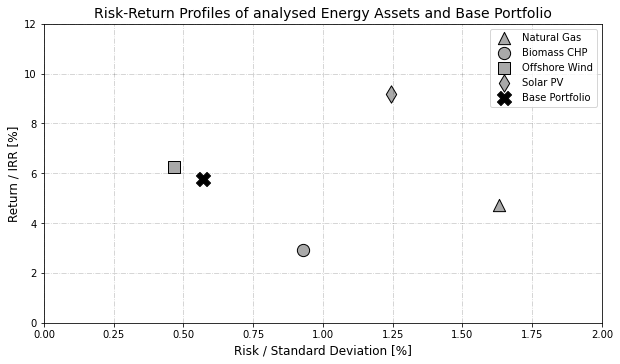

In [ ]:
plt.figure(figsize = (10,5.5))
marker_size = 150
plt.scatter(gas_std, gas_mean, facecolors = "darkgrey", edgecolors = "black", s = marker_size, marker = "^", label = "Natural Gas")
plt.scatter(bio_std, bio_mean, facecolors = "darkgrey", edgecolors = "black", s = marker_size, marker = "o", label = "Biomass CHP")
plt.scatter(wind_std, wind_mean, facecolors = "darkgrey", edgecolors = "black", s = marker_size, marker = "s", label = "Offshore Wind")
plt.scatter(solar_std, solar_mean, facecolors = "darkgrey", edgecolors = "black", s = marker_size, marker = "d", label = "Solar PV")
plt.grid(color = "black", alpha = 0.2, linestyle = "-.")

# Initial Portfolio
base_size = 200
plt.scatter(initial_risk, initial_return, facecolors = "black", edgecolors = "black", s = base_size,marker = "X", color = "grey", label = "Base Portfolio")


# Labels
plt.title("Risk-Return Profiles of analysed Energy Assets and Base Portfolio", size = 14)
plt.legend()
plt.xlabel("Risk / Standard Deviation [%]", size = 12)
plt.ylabel("Return / IRR [%]", size = 12)
plt.xlim((0,2))
plt.ylim((0,12))

plt.savefig("/content/drive/MyDrive/Colab Notebooks/Thesis/Mean-Variance Analysis/Figures/Base_Portfolio_Assets.png", dpi = 300, bbox_inches='tight')

In [ ]:
sns.color_palette("Reds")

[(0.9950634371395617, 0.8596539792387543, 0.7986620530565167),
 (0.9882352941176471, 0.6866743560169165, 0.5778854286812765),
 (0.9865897731641676, 0.5067281814686659, 0.38123798539023457),
 (0.9570011534025374, 0.3087120338331411, 0.22191464821222606),
 (0.8370472895040368, 0.13394848135332565, 0.13079584775086506),
 (0.6663437139561708, 0.06339100346020761, 0.08641291810841982)]

### Minimise Risk - Efficient Frontier

---

In this model, the efficient frontier is generated, by calculating the minimum risk of a portfolio, for an expected level of return. The level of return is varied, in order to obtain different portfolio allocations. 

#### Minimise Risk - Efficient Frontier - 25 % Liquidity

---

In this model, the efficient frontier is generated, by calculating the minimum risk of a portfolio, for an expected level of return. The level of return is varied, in order to obtain different portfolio allocations. 

In [ ]:
# Obtain Technologies 
technologies = IRR_results.columns
technologies = [s.replace(' IRR', '') for s in technologies]

####################### Define Sets
Imax = np.shape(IRR_results)[1]

####################### Parameters

# Correlation Matrix
rho_param = rho.to_numpy()

# Covariance Matrix
sigma_param = sigma.to_numpy()

# Return
returns_param = returns.to_numpy()

In [ ]:
####################### Iteration

results_columns = ["Return", "Risk", "Gas Share", "Bio Share", "Wind Share", "Solar Share"]
portfolio_results = pd.DataFrame(data = [] ,columns=results_columns)

# Set the return requirement
# 'returns' is the variable that holds average returns of assets. 

return_vector = np.linspace(5,6.8,num = 100)         # in PERCENT %

for n in range(len(return_vector)):
  m_return = return_vector[n]

  ####################### Model

  model = ConcreteModel()

  # Define Sets
  model.Iset = range(Imax)
  model.Jset = range(Imax)

  ####################### Variables
  #Define variables x and y
  model.x = Var(model.Iset,domain = NonNegativeReals)

  ####################### Objective Function
  #Define objectives
  model.obj = Objective(expr = sum(model.x[i]*model.x[j]*sigma_param[0,i]*sigma_param[0,j]*rho_param[i,j] for i in model.Iset for j in model.Jset), sense = minimize)

  ####################### Constraints
  model.limits = ConstraintList()

  # Performance Constraint
  model.limits.add(sum(model.x[i]*returns_param[0,i] for i in model.Iset) == m_return)

  # Budget Constraint
  model.limits.add(sum(model.x[i] for i in model.Iset) == 1)

  # Tokenisation Constraints
  for i in model.Iset:
    model.limits.add(model.x[i] >= 0.1875)



  ############################################# Solve Model and Print Results
  opt=SolverFactory('ipopt', executable='/content/ipopt')
  instance = model.create_instance()
  results = opt.solve(instance) # solves and updates instance
  # print('OF= ',value(instance.obj))

  # Print the solution
  #for i in model.Iset:
  #  print(technologies[i], instance.x[i].value)

  ######################### Outputs and Results

  ##### Report Asset Shares
  asset_shares = []

  for m in model.Iset:
    asset_shares.append(instance.x[m].value)

  #### Create Results DataFrame
  portfolio_risk = np.sqrt(value(instance.obj))
  print(portfolio_risk)

  output = pd.DataFrame(data = [[m_return,portfolio_risk, *asset_shares]] ,columns=results_columns)

  portfolio_results = portfolio_results.append(output)
  portfolio_results.reset_index(inplace = True)
  portfolio_results.drop(["index"], axis = 1, inplace = True)

    model.name="unknown";
      - termination condition: infeasible
      - message from solver: Ipopt 3.12.13\x3a Converged to a locally
        infeasible point. Problem may be infeasible.
0.5641249013692592
    model.name="unknown";
      - termination condition: infeasible
      - message from solver: Ipopt 3.12.13\x3a Converged to a locally
        infeasible point. Problem may be infeasible.
0.5635509914421508
    model.name="unknown";
      - termination condition: infeasible
      - message from solver: Ipopt 3.12.13\x3a Converged to a locally
        infeasible point. Problem may be infeasible.
0.5630128487361807
    model.name="unknown";
      - termination condition: infeasible
      - message from solver: Ipopt 3.12.13\x3a Converged to a locally
        infeasible point. Problem may be infeasible.
0.5625105758985454
0.5597730525904134
0.5566000131465412
0.553466994684492
0.5503746801066698
0.5473237592340403
0.5443149278910289
0.5413488882990711
0.5384263473972957
0.5355480

In [ ]:
portfolio_results

,Return,Risk,Gas Share,Bio Share,Wind Share,Solar Share
0,5.000000,0.564125,0.1875,0.446715,0.187500,0.178285
1,5.018182,0.563551,0.1875,0.443811,0.187500,0.181189
2,5.036364,0.563013,0.1875,0.440906,0.187500,0.184094
3,5.054545,0.562511,0.1875,0.438002,0.187500,0.186998
4,5.072727,0.559773,0.1875,0.432959,0.192042,0.187500
...,...,...,...,...,...,...
95,6.727273,0.661157,0.1875,0.187500,0.187500,0.448871
96,6.745455,0.663217,0.1875,0.187500,0.187500,0.450849
97,6.763636,0.665280,0.1875,0.187500,0.187500,0.452828
98,6.781818,0.667345,0.1875,0.187500,0.187500,0.454806


In [ ]:
efficient_frontier1 = portfolio_results
risk_return1 = efficient_frontier1[["Return", "Risk"]]

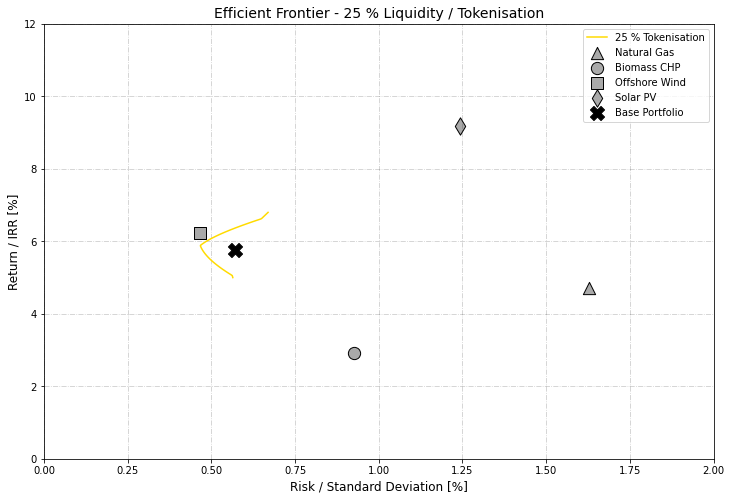

In [ ]:
# Plotting of All Liquidity Limits as well as initial portfolio.
plt.figure(figsize = (12,8))

# Assets
marker_size = 150
plt.scatter(gas_std, gas_mean, facecolors = "darkgrey", edgecolors = "black", s = marker_size, marker = "^", label = "Natural Gas")
plt.scatter(bio_std, bio_mean, facecolors = "darkgrey", edgecolors = "black", s = marker_size, marker = "o", label = "Biomass CHP")
plt.scatter(wind_std, wind_mean, facecolors = "darkgrey", edgecolors = "black", s = marker_size, marker = "s", label = "Offshore Wind")
plt.scatter(solar_std, solar_mean, facecolors = "darkgrey", edgecolors = "black", s = marker_size, marker = "d", label = "Solar PV")

# Efficient Frontier
plt.plot(risk_return1["Risk"], risk_return1["Return"], color = sns.color_palette("autumn")[5], label = "25 % Tokenisation")

# Initial Portfolio
base_size = 200
plt.scatter(initial_risk, initial_return, facecolors = "black", edgecolors = "black", s = base_size,marker = "X", color = "grey", label = "Base Portfolio")

# Labels
plt.title("Efficient Frontier - 25 % Liquidity / Tokenisation", size = 14)
plt.grid(color = "black", alpha = 0.2, linestyle = "-.")
plt.legend()
plt.xlabel("Risk / Standard Deviation [%]", size = 12)
plt.ylabel("Return / IRR [%]", size = 12)
plt.xlim((0,2))
plt.ylim((0,12))

plt.savefig("/content/drive/MyDrive/Colab Notebooks/Thesis/Mean-Variance Analysis/Figures/Efficient_Frontier_25.png", dpi = 300, bbox_inches='tight')

#### Minimise Risk - Efficient Frontier - 50 % Liquidity

---

In this model, the efficient frontier is generated, by calculating the minimum risk of a portfolio, for an expected level of return. The level of return is varied, in order to obtain different portfolio allocations. 

In [ ]:
# Obtain Technologies 
technologies = IRR_results.columns
technologies = [s.replace(' IRR', '') for s in technologies]

####################### Define Sets
Imax = np.shape(IRR_results)[1]

####################### Parameters

# Correlation Matrix
rho_param = rho.to_numpy()

# Covariance Matrix
sigma_param = sigma.to_numpy()

# Return
returns_param = returns.to_numpy()

In [ ]:
####################### Iteration

results_columns = ["Return", "Risk", "Gas Share", "Bio Share", "Wind Share", "Solar Share"]
portfolio_results = pd.DataFrame(data = [] ,columns=results_columns)

# Set the return requirement
# 'returns' is the variable that holds average returns of assets. 

return_vector = np.linspace(4,7.5,num = 100)         # in PERCENT %

for n in range(len(return_vector)):
  m_return = return_vector[n]

  ####################### Model

  model = ConcreteModel()

  # Define Sets
  model.Iset = range(Imax)
  model.Jset = range(Imax)

  ####################### Variables
  #Define variables x and y
  model.x = Var(model.Iset,domain = NonNegativeReals)

  ####################### Objective Function
  #Define objectives
  model.obj = Objective(expr = sum(model.x[i]*model.x[j]*sigma_param[0,i]*sigma_param[0,j]*rho_param[i,j] for i in model.Iset for j in model.Jset), sense = minimize)

  ####################### Constraints
  model.limits = ConstraintList()

  # Performance Constraint
  model.limits.add(sum(model.x[i]*returns_param[0,i] for i in model.Iset) == m_return)

  # Budget Constraint
  model.limits.add(sum(model.x[i] for i in model.Iset) == 1)

  # Tokenisation Constraints
  for i in model.Iset:
    model.limits.add(model.x[i] >= 0.125)



  ############################################# Solve Model and Print Results
  opt=SolverFactory('ipopt', executable='/content/ipopt')
  instance = model.create_instance()
  results = opt.solve(instance) # solves and updates instance
  # print('OF= ',value(instance.obj))

  # Print the solution
  #for i in model.Iset:
  #  print(technologies[i], instance.x[i].value)

  ######################### Outputs and Results

  ##### Report Asset Shares
  asset_shares = []

  for m in model.Iset:
    asset_shares.append(instance.x[m].value)

  #### Create Results DataFrame
  portfolio_risk = np.sqrt(value(instance.obj))
  print(portfolio_risk)

  output = pd.DataFrame(data = [[m_return,portfolio_risk, *asset_shares]] ,columns=results_columns)

  portfolio_results = portfolio_results.append(output)
  portfolio_results.reset_index(inplace = True)
  portfolio_results.drop(["index"], axis = 1, inplace = True)

    model.name="unknown";
      - termination condition: infeasible
      - message from solver: Ipopt 3.12.13\x3a Converged to a locally
        infeasible point. Problem may be infeasible.
0.6699802768250013
    model.name="unknown";
      - termination condition: infeasible
      - message from solver: Ipopt 3.12.13\x3a Converged to a locally
        infeasible point. Problem may be infeasible.
0.6659249635461544
    model.name="unknown";
      - termination condition: infeasible
      - message from solver: Ipopt 3.12.13\x3a Converged to a locally
        infeasible point. Problem may be infeasible.
0.6619617074997156
    model.name="unknown";
      - termination condition: infeasible
      - message from solver: Ipopt 3.12.13\x3a Converged to a locally
        infeasible point. Problem may be infeasible.
0.6580921718367861
    model.name="unknown";
      - termination condition: infeasible
      - message from solver: Ipopt 3.12.13\x3a Converged to a locally
        infeasible poi

In [ ]:
portfolio_results

,Return,Risk,Gas Share,Bio Share,Wind Share,Solar Share
0,4.000000,0.669980,0.125,0.680612,0.125000,0.069388
1,4.035354,0.665925,0.125,0.674965,0.125000,0.075035
2,4.070707,0.661962,0.125,0.669317,0.125000,0.080683
3,4.106061,0.658092,0.125,0.663670,0.125000,0.086330
4,4.141414,0.654318,0.125,0.658023,0.125000,0.091977
...,...,...,...,...,...,...
95,7.358586,0.764355,0.125,0.125000,0.165610,0.584390
96,7.393939,0.777944,0.125,0.125000,0.153621,0.596379
97,7.429293,0.791621,0.125,0.125000,0.141632,0.608368
98,7.464646,0.805381,0.125,0.125000,0.129643,0.620357


In [ ]:
efficient_frontier2 = portfolio_results
risk_return2 = efficient_frontier2[["Return", "Risk"]]


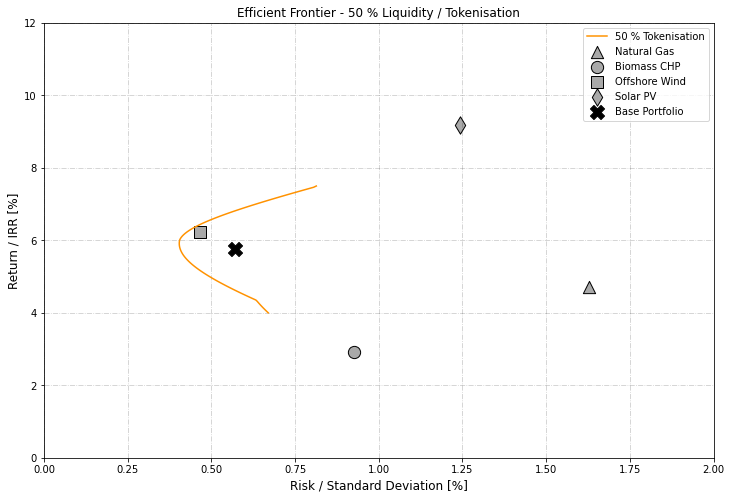

In [ ]:
# Plotting of All Liquidity Limits as well as initial portfolio.
plt.figure(figsize = (12,8))

# Assets
marker_size = 150
plt.scatter(gas_std, gas_mean, facecolors = "darkgrey", edgecolors = "black", s = marker_size, marker = "^", label = "Natural Gas")
plt.scatter(bio_std, bio_mean, facecolors = "darkgrey", edgecolors = "black", s = marker_size, marker = "o", label = "Biomass CHP")
plt.scatter(wind_std, wind_mean, facecolors = "darkgrey", edgecolors = "black", s = marker_size, marker = "s", label = "Offshore Wind")
plt.scatter(solar_std, solar_mean, facecolors = "darkgrey", edgecolors = "black", s = marker_size, marker = "d", label = "Solar PV")

# Efficient Frontier
plt.plot(risk_return2["Risk"], risk_return2["Return"], color = sns.color_palette("autumn")[3], label = "50 % Tokenisation")

# Initial Portfolio
base_size = 200
plt.scatter(initial_risk, initial_return, facecolors = "black", edgecolors = "black", s = base_size,marker = "X", color = "grey", label = "Base Portfolio")

# Design
plt.title("Efficient Frontier - 50 % Liquidity / Tokenisation")
plt.grid(color = "black", alpha = 0.2, linestyle = "-.")
plt.legend()
plt.xlabel("Risk / Standard Deviation [%]", size = 12)
plt.ylabel("Return / IRR [%]", size = 12)
plt.xlim((0,2))
plt.ylim((0,12))

plt.savefig("/content/drive/MyDrive/Colab Notebooks/Thesis/Mean-Variance Analysis/Figures/Efficient_Frontier_50.png", dpi = 300, bbox_inches='tight')

#### Minimise Risk - Efficient Frontier - 75 % Liquidity

---

In this model, the efficient frontier is generated, by calculating the minimum risk of a portfolio, for an expected level of return. The level of return is varied, in order to obtain different portfolio allocations. 

In [ ]:
# Obtain Technologies 
technologies = IRR_results.columns
technologies = [s.replace(' IRR', '') for s in technologies]

####################### Define Sets
Imax = np.shape(IRR_results)[1]

####################### Parameters

# Correlation Matrix
rho_param = rho.to_numpy()

# Covariance Matrix
sigma_param = sigma.to_numpy()

# Return
returns_param = returns.to_numpy()

In [ ]:
####################### Iteration

results_columns = ["Return", "Risk", "Gas Share", "Bio Share", "Wind Share", "Solar Share"]
portfolio_results = pd.DataFrame(data = [] ,columns=results_columns)

# Set the return requirement
# 'returns' is the variable that holds average returns of assets. 

return_vector = np.linspace(3.5,8.8,num = 100)         # in PERCENT %

for n in range(len(return_vector)):
  m_return = return_vector[n]

  ####################### Model

  model = ConcreteModel()

  # Define Sets
  model.Iset = range(Imax)
  model.Jset = range(Imax)

  ####################### Variables
  #Define variables x and y
  model.x = Var(model.Iset,domain = NonNegativeReals)

  ####################### Objective Function
  #Define objectives
  model.obj = Objective(expr = sum(model.x[i]*model.x[j]*sigma_param[0,i]*sigma_param[0,j]*rho_param[i,j] for i in model.Iset for j in model.Jset), sense = minimize)

  ####################### Constraints
  model.limits = ConstraintList()

  # Performance Constraint
  model.limits.add(sum(model.x[i]*returns_param[0,i] for i in model.Iset) == m_return)

  # Budget Constraint
  model.limits.add(sum(model.x[i] for i in model.Iset) == 1)

  # Tokenisation Constraints
  for i in model.Iset:
    model.limits.add(model.x[i] >= 0.0625)



  ############################################# Solve Model and Print Results
  opt=SolverFactory('ipopt', executable='/content/ipopt')
  instance = model.create_instance()
  results = opt.solve(instance) # solves and updates instance
  # print('OF= ',value(instance.obj))

  # Print the solution
  #for i in model.Iset:
  #  print(technologies[i], instance.x[i].value)

  ######################### Outputs and Results

  ##### Report Asset Shares
  asset_shares = []

  for m in model.Iset:
    asset_shares.append(instance.x[m].value)

  #### Create Results DataFrame
  portfolio_risk = np.sqrt(value(instance.obj))
  print(portfolio_risk)

  output = pd.DataFrame(data = [[m_return,portfolio_risk, *asset_shares]] ,columns=results_columns)

  portfolio_results = portfolio_results.append(output)
  portfolio_results.reset_index(inplace = True)
  portfolio_results.drop(["index"], axis = 1, inplace = True)

    model.name="unknown";
      - termination condition: infeasible
      - message from solver: Ipopt 3.12.13\x3a Converged to a locally
        infeasible point. Problem may be infeasible.
0.7821267193727032
    model.name="unknown";
      - termination condition: infeasible
      - message from solver: Ipopt 3.12.13\x3a Converged to a locally
        infeasible point. Problem may be infeasible.
0.7749439976134262
    model.name="unknown";
      - termination condition: infeasible
      - message from solver: Ipopt 3.12.13\x3a Converged to a locally
        infeasible point. Problem may be infeasible.
0.7679251697944235
0.7554421883592553
0.7375859051620975
0.7231653600280701
0.7093095300141989
0.6955681855063114
0.681948247015742
0.6684571355339262
0.655102810292765
0.641893808559569
0.6288392882563207
0.6159490704585247
0.6032336905615823
0.5907044379160972
0.5783734102041767
0.5662535547046432
0.5543587234845204
0.5427037128183664
0.5313043054800834
0.5201773059842671
0.5093405676

In [ ]:
portfolio_results

,Return,Risk,Gas Share,Bio Share,Wind Share,Solar Share
0,3.500000,0.782127,0.062500,0.834642,0.0625,0.040359
1,3.553535,0.774944,0.062500,0.826090,0.0625,0.048910
2,3.607071,0.767925,0.062500,0.817539,0.0625,0.057461
3,3.660606,0.755442,0.074850,0.800150,0.0625,0.062500
4,3.714141,0.737586,0.104914,0.770086,0.0625,0.062500
...,...,...,...,...,...,...
95,8.585859,1.049983,0.062500,0.062500,0.0625,0.839919
96,8.639394,1.057182,0.062500,0.062500,0.0625,0.845744
97,8.692929,1.064382,0.062500,0.062500,0.0625,0.851570
98,8.746465,1.071582,0.062500,0.062500,0.0625,0.857396


In [ ]:
efficient_frontier3 = portfolio_results
risk_return3 = efficient_frontier3[["Return", "Risk"]]

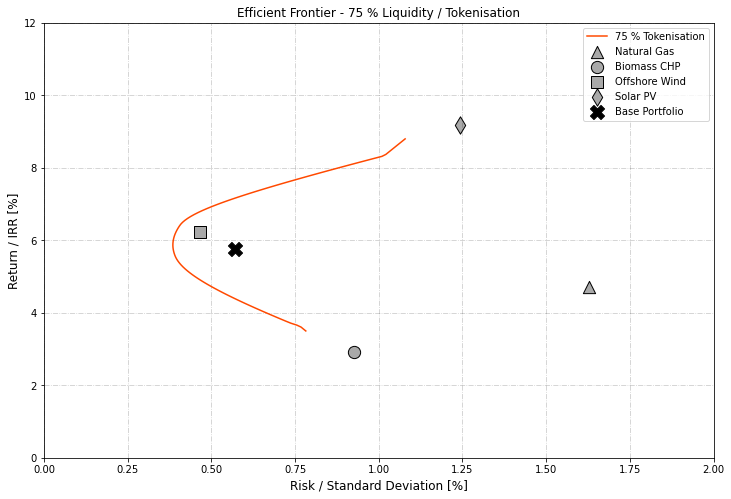

In [ ]:
# Plotting of All Liquidity Limits as well as initial portfolio.
plt.figure(figsize = (12,8))

# Assets
marker_size = 150
plt.scatter(gas_std, gas_mean, facecolors = "darkgrey", edgecolors = "black", s = marker_size, marker = "^", label = "Natural Gas")
plt.scatter(bio_std, bio_mean, facecolors = "darkgrey", edgecolors = "black", s = marker_size, marker = "o", label = "Biomass CHP")
plt.scatter(wind_std, wind_mean, facecolors = "darkgrey", edgecolors = "black", s = marker_size, marker = "s", label = "Offshore Wind")
plt.scatter(solar_std, solar_mean, facecolors = "darkgrey", edgecolors = "black", s = marker_size, marker = "d", label = "Solar PV")

# Efficient Frontier
plt.plot(risk_return3["Risk"], risk_return3["Return"], color = sns.color_palette("autumn")[1], label = "75 % Tokenisation")

# Initial Portfolio
base_size = 200
plt.scatter(initial_risk, initial_return, facecolors = "black", edgecolors = "black", s = base_size,marker = "X", color = "grey", label = "Base Portfolio")

# Design
plt.title("Efficient Frontier - 75 % Liquidity / Tokenisation")
plt.grid(color = "black", alpha = 0.2, linestyle = "-.")
plt.legend()
plt.xlabel("Risk / Standard Deviation [%]", size = 12)
plt.ylabel("Return / IRR [%]", size = 12)
plt.xlim((0,2))
plt.ylim((0,12))

plt.savefig("/content/drive/MyDrive/Colab Notebooks/Thesis/Mean-Variance Analysis/Figures/Efficient_Frontier_75.png", dpi = 300, bbox_inches='tight')

#### Minimise Risk - Efficient Frontier - 100 % Liquidity

---

In [ ]:
# Obtain Technologies 
technologies = IRR_results.columns
technologies = [s.replace(' IRR', '') for s in technologies]

####################### Define Set Size
Imax = np.shape(IRR_results)[1]

####################### Parameters

# Correlation Matrix
rho_param = rho.to_numpy()

# Covariance Matrix
sigma_param = sigma.to_numpy()

# Return
returns_param = returns.to_numpy()

In [ ]:
sigma_param

array([[1.62937688, 0.92736819, 0.46706332, 1.24389351]])

In [ ]:
####################### Iteration

results_columns = ["Return", "Risk", "Gas Share", "Bio Share", "Wind Share", "Solar Share"]
portfolio_results = pd.DataFrame(data = [] ,columns=results_columns)

# Set the return requirement
# 'returns' is the variable that holds average returns of assets. 

return_vector = np.linspace(returns.min(axis = 1),returns.max(axis = 1),num = 100)         # in PERCENT %

for n in range(len(return_vector)):
  m_return = return_vector[n][0]

  ####################### Model

  model = ConcreteModel()

  # Define Sets
  model.Iset = range(Imax)
  model.Jset = range(Imax)

  ####################### Variables
  #Define variables x and y
  model.x = Var(model.Iset,domain = NonNegativeReals)

  ####################### Objective Function
  #Define objectives
  model.obj = Objective(expr = sum(model.x[i]*model.x[j]*sigma_param[0,i]*sigma_param[0,j]*rho_param[i,j] for i in model.Iset for j in model.Jset), sense = minimize)

  ####################### Constraints
  model.limits = ConstraintList()

  # Performance Constraint
  model.limits.add(sum(model.x[i]*returns_param[0,i] for i in model.Iset) == m_return)

  # Budget Constraint
  model.limits.add(sum(model.x[i] for i in model.Iset) == 1)


  ############################################# Solve Model and Print Results
  opt=SolverFactory('ipopt', executable='/content/ipopt')
  instance = model.create_instance()
  results = opt.solve(instance) # solves and updates instance
  # print('OF= ',value(instance.obj))

  # Print the solution
  #for i in model.Iset:
  #  print(technologies[i], instance.x[i].value)

  ######################### Outputs and Results

  ##### Report Asset Shares
  asset_shares = []

  for m in model.Iset:
    asset_shares.append(instance.x[m].value)

  #### Create Results DataFrame
  portfolio_risk = np.sqrt(value(instance.obj))

  output = pd.DataFrame(data = [[m_return,portfolio_risk, *asset_shares]] ,columns=results_columns)

  portfolio_results = portfolio_results.append(output)
  portfolio_results.reset_index(inplace = True)
  portfolio_results.drop(["index"], axis = 1, inplace = True)

In [ ]:
efficient_frontier4 = portfolio_results
risk_return4 = efficient_frontier4[["Return", "Risk"]]

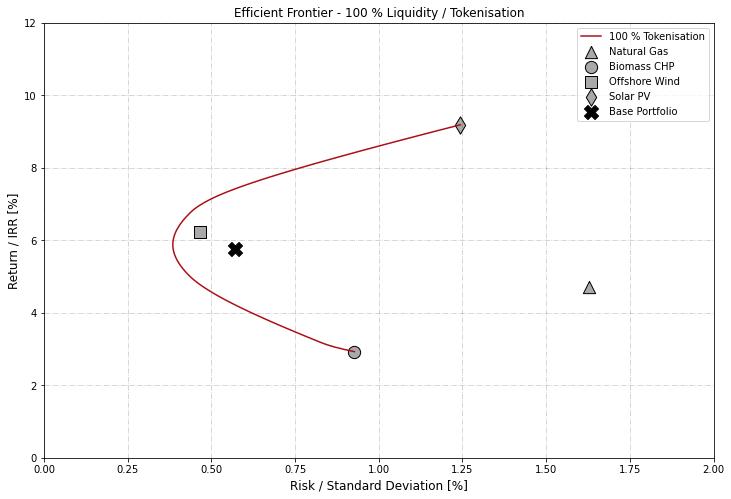

In [ ]:
# Plotting of All Liquidity Limits as well as initial portfolio.
plt.figure(figsize = (12,8))

# Assets
marker_size = 150
plt.scatter(gas_std, gas_mean, facecolors = "darkgrey", edgecolors = "black", s = marker_size, marker = "^", label = "Natural Gas")
plt.scatter(bio_std, bio_mean, facecolors = "darkgrey", edgecolors = "black", s = marker_size, marker = "o", label = "Biomass CHP")
plt.scatter(wind_std, wind_mean, facecolors = "darkgrey", edgecolors = "black", s = marker_size, marker = "s", label = "Offshore Wind")
plt.scatter(solar_std, solar_mean, facecolors = "darkgrey", edgecolors = "black", s = marker_size, marker = "d", label = "Solar PV")

# Efficient Frontier
plt.plot(risk_return4["Risk"], risk_return4["Return"], color = sns.color_palette("Reds")[5],label = "100 % Tokenisation")

# Initial Portfolio
base_size = 200
plt.scatter(initial_risk, initial_return, facecolors = "black", edgecolors = "black", s = base_size,marker = "X", color = "grey", label = "Base Portfolio")

# Design
plt.title("Efficient Frontier - 100 % Liquidity / Tokenisation")
plt.grid(color = "black", alpha = 0.2, linestyle = "-.")
plt.legend()
plt.xlabel("Risk / Standard Deviation [%]", size = 12)
plt.ylabel("Return / IRR [%]", size = 12)
plt.xlim((0,2))
plt.ylim((0,12))

plt.savefig("/content/drive/MyDrive/Colab Notebooks/Thesis/Mean-Variance Analysis/Figures/Efficient_Frontier_100.png", dpi = 300, bbox_inches='tight')

#### Minimum Variance Portfolios

---

In this section, the minimum variance portfolios for each liquidity limitation will be calculated. 

In [ ]:
# 25 % Liquidity
mvp_index = efficient_frontier1["Risk"].idxmin()
mvp1 = efficient_frontier1.iloc[mvp_index]

# 50 % Liquidity
mvp_index = efficient_frontier2["Risk"].idxmin()
mvp2 = efficient_frontier2.iloc[mvp_index]

# 75 % Liquidity
mvp_index = efficient_frontier3["Risk"].idxmin()
mvp3 = efficient_frontier3.iloc[mvp_index]

# Base - 100 % Liquidity
mvp_index = efficient_frontier4["Risk"].idxmin()
mvp4 = efficient_frontier4.iloc[mvp_index,:]

# Consolidated Results 
mvp_results = pd.concat([mvp1, mvp2, mvp3, mvp4], axis=1)
mvp_results.columns = ["25%", "50%", "75%", "100%"]
mvp_results

,25%,50%,75%,100%
Return,5.872727,5.909091,5.855556,5.901175
Risk,0.467376,0.404124,0.385084,0.384949
Gas Share,0.187500,0.125000,0.062500,0.055778
Bio Share,0.191375,0.153629,0.172612,0.166375
Wind Share,0.433625,0.596371,0.669169,0.677151
Solar Share,0.187500,0.125000,0.095719,0.100696


In [ ]:
mvp4[0]

5.901174696969672

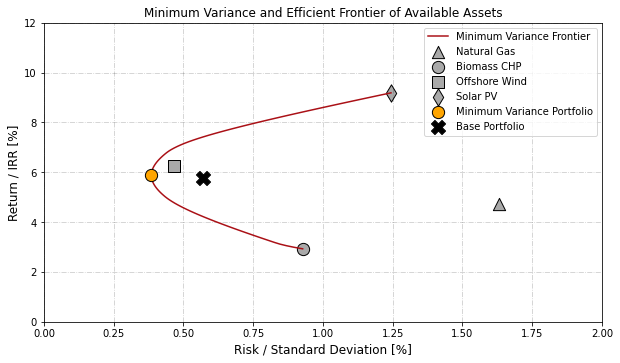

In [ ]:
# Plotting of All Liquidity Limits as well as initial portfolio.
plt.figure(figsize = (10,5.5))

# Assets
marker_size = 150
plt.scatter(gas_std, gas_mean, facecolors = "darkgrey", edgecolors = "black", s = marker_size, marker = "^", label = "Natural Gas")
plt.scatter(bio_std, bio_mean, facecolors = "darkgrey", edgecolors = "black", s = marker_size, marker = "o", label = "Biomass CHP")
plt.scatter(wind_std, wind_mean, facecolors = "darkgrey", edgecolors = "black", s = marker_size, marker = "s", label = "Offshore Wind")
plt.scatter(solar_std, solar_mean, facecolors = "darkgrey", edgecolors = "black", s = marker_size, marker = "d", label = "Solar PV")

# Minimum Varince Portfolio
plt.scatter(mvp4[1], mvp4[0], facecolors = "orange", edgecolors = "black", s = marker_size, marker = "o", label = "Minimum Variance Portfolio", zorder = 10)


# Efficient Frontier
plt.plot(risk_return4["Risk"], risk_return4["Return"], color = sns.color_palette("Reds")[5],label = "Minimum Variance Frontier")

# Initial Portfolio
base_size = 200
plt.scatter(initial_risk, initial_return, facecolors = "black", edgecolors = "black", s = base_size,marker = "X", color = "grey", label = "Base Portfolio")

# Design
plt.title("Minimum Variance and Efficient Frontier of Available Assets")
plt.grid(color = "black", alpha = 0.2, linestyle = "-.")
plt.legend()
plt.xlabel("Risk / Standard Deviation [%]", size = 12)
plt.ylabel("Return / IRR [%]", size = 12)
plt.xlim((0,2))
plt.ylim((0,12))

plt.savefig("/content/drive/MyDrive/Colab Notebooks/Thesis/Mean-Variance Analysis/Figures/Efficient_Frontier_MVP.png", dpi = 300, bbox_inches='tight')

#### Comparison of Results

---



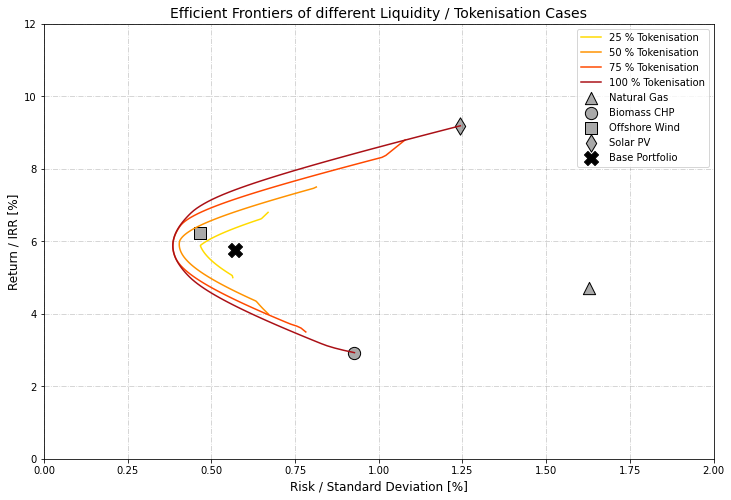

In [ ]:
# Plotting of All Liquidity Limits as well as initial portfolio.
plt.figure(figsize = (12,8))

# Assets
marker_size = 150
plt.scatter(gas_std, gas_mean, facecolors = "darkgrey", edgecolors = "black", s = marker_size, marker = "^", label = "Natural Gas")
plt.scatter(bio_std, bio_mean, facecolors = "darkgrey", edgecolors = "black", s = marker_size, marker = "o", label = "Biomass CHP")
plt.scatter(wind_std, wind_mean, facecolors = "darkgrey", edgecolors = "black", s = marker_size, marker = "s", label = "Offshore Wind")
plt.scatter(solar_std, solar_mean, facecolors = "darkgrey", edgecolors = "black", s = marker_size, marker = "d", label = "Solar PV")

# Efficient Frontier
plt.plot(risk_return1["Risk"], risk_return1["Return"], color = sns.color_palette("autumn")[5], label = "25 % Tokenisation")
plt.plot(risk_return2["Risk"], risk_return2["Return"], color = sns.color_palette("autumn")[3], label = "50 % Tokenisation")
plt.plot(risk_return3["Risk"], risk_return3["Return"], color = sns.color_palette("autumn")[1], label = "75 % Tokenisation")
plt.plot(risk_return4["Risk"], risk_return4["Return"], color = sns.color_palette("Reds")[5],label = "100 % Tokenisation")

# Initial Portfolio
base_size = 200
plt.scatter(initial_risk, initial_return, facecolors = "black", edgecolors = "black", s = base_size,marker = "X", color = "grey", label = "Base Portfolio")

# Design
plt.title("Efficient Frontiers of different Liquidity / Tokenisation Cases", size = 14)
plt.grid(color = "black", alpha = 0.2, linestyle = "-.")
plt.legend()
plt.xlabel("Risk / Standard Deviation [%]", size = 12)
plt.ylabel("Return / IRR [%]", size = 12)
plt.xlim((0,2))
plt.ylim((0,12))

plt.savefig("/content/drive/MyDrive/Colab Notebooks/Thesis/Mean-Variance Analysis/Figures/Comparison_Efficient_Frontiers.png", dpi = 300, bbox_inches='tight')

### Optimal Portfolio Allocation



--- 

In this section, the optimisation maximises the Sharpe ratio (without taking the risk-free ratio into account). 

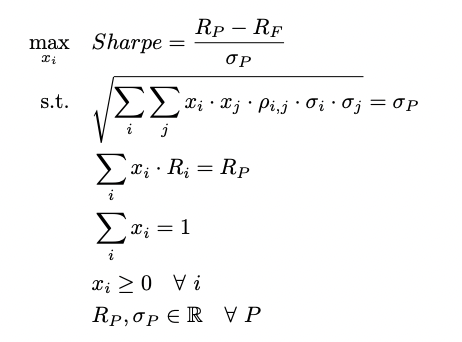

#### Optimal Portfolio - 25 % Liquidity

---

In [ ]:
# Obtain Technologies 
technologies = IRR_results.columns
technologies = [s.replace(' IRR', '') for s in technologies]

####################### Define Sets
Imax = np.shape(IRR_results)[1]

####################### Parameters

# Correlation Matrix
rho_param = rho.to_numpy()

# Covariance Matrix
sigma_param = sigma.to_numpy()

# Return
returns_param = returns.to_numpy()

# Risk-Free Rate
risk_free = 0.7

In [ ]:
####################### Iteration COPY

# Set the return requirement
results_columns = ["Sharpe","Return", "Risk", "Gas Share", "Bio Share", "Wind Share", "Solar Share"]
portfolio_results = pd.DataFrame(data = [] ,columns=results_columns)

####################### Model

model = ConcreteModel()

# Define Sets
model.Iset = range(Imax)
model.Jset = range(Imax)

####################### Variables
#Define variables
model.x = Var(model.Iset,domain = NonNegativeReals)
model.m_return = Var(domain = NonNegativeReals)
model.risk = Var(domain = NonNegativeReals)
model.sharpe = Var(domain = NonNegativeReals)
model.stdev = Var(domain = NonNegativeReals)

####################### Objective Function
#Define objective
model.obj = Objective(expr = model.sharpe, sense = maximize)

####################### Constraints
model.limits = ConstraintList()

# Risk Constraint
model.limits.add(sum(model.x[i]*model.x[j]*sigma_param[0,i]*sigma_param[0,j]*rho_param[i,j] for i in model.Iset for j in model.Jset) == model.risk**2)

# Performance Constraint
model.limits.add(sum(model.x[i]*returns_param[0,i] for i in model.Iset) == model.m_return)

###### CONSTRAIN SOLUTION SPACE SO THAT THE SOLVER CAN FIND THE PROPER OPTIMAL SOLUTION - OTHERWISE YOU WILL NOT GET IT!
model.limits.add(5.7 <= model.m_return)

# Budget Constraint
model.limits.add(sum(model.x[i] for i in model.Iset) == 1)

# Tokenisation Constraints
for i in model.Iset:
  model.limits.add(model.x[i] >= 0.1875)


# Sharpe Constraint
model.limits.add(np.divide((model.m_return-risk_free),model.risk) == model.sharpe)


############## Solver
SolverFactory('ipopt', executable='/content/ipopt').solve(model).write()


######################### Outputs and Results

print("Objective:",value(model.obj))
print("Sharpe Ratio:", value(model.sharpe))
##### Report Asset Shares
asset_shares = []

for m in model.Iset:
 asset_shares.append(value(model.x[m]))

#### Create Results DataFrame
portfolio_return = value(model.m_return)
portfolio_risk = value(model.risk)
portfolio_sharpe = value(model.sharpe)

output = pd.DataFrame(data = [[portfolio_sharpe, portfolio_return,portfolio_risk, *asset_shares]] ,columns=results_columns)

portfolio_results = portfolio_results.append(output)
portfolio_results.reset_index(inplace = True)
portfolio_results.drop(["index"], axis = 1, inplace = True)
print("HI")

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 9
  Number of variables: 7
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.12.13\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.0406041145324707
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
Objectiv

In [ ]:
opt_portfolio1 = portfolio_results
opt_portfolio1

,Sharpe,Return,Risk,Gas Share,Bio Share,Wind Share,Solar Share
0,11.107925,5.88556,0.466834,0.1875,0.1875,0.4375,0.1875


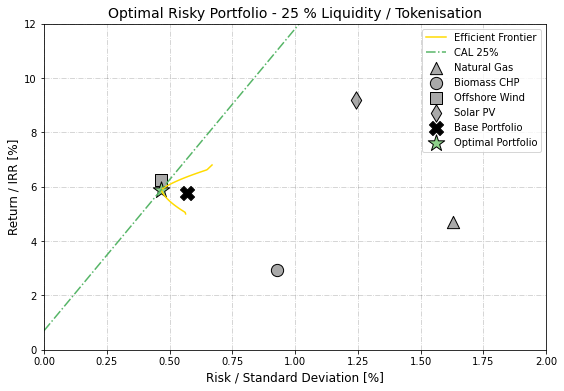

In [ ]:
# Plotting of All Liquidity Limits as well as initial portfolio.
plt.figure(figsize = (9,6))

# Assets
marker_size = 150
plt.scatter(gas_std, gas_mean, facecolors = "darkgrey", edgecolors = "black", s = marker_size, marker = "^", label = "Natural Gas")
plt.scatter(bio_std, bio_mean, facecolors = "darkgrey", edgecolors = "black", s = marker_size, marker = "o", label = "Biomass CHP")
plt.scatter(wind_std, wind_mean, facecolors = "darkgrey", edgecolors = "black", s = marker_size, marker = "s", label = "Offshore Wind")
plt.scatter(solar_std, solar_mean, facecolors = "darkgrey", edgecolors = "black", s = marker_size, marker = "d", label = "Solar PV")

# Efficient Frontier
plt.plot(risk_return1["Risk"], risk_return1["Return"], color = sns.color_palette("autumn")[5], label = "Efficient Frontier")

# Initial Portfolio
base_size = 200
plt.scatter(initial_risk, initial_return, facecolors = "black", edgecolors = "black", s = base_size,marker = "X", color = "grey", label = "Base Portfolio")

# Optimal Portfolios
marker_size = 300
plt.scatter(opt_portfolio1["Risk"],opt_portfolio1["Return"], color = sns.color_palette("Greens")[2], edgecolors = "black", s = marker_size,marker = "*", label = "Optimal Portfolio")

# CAL
x_test = np.linspace(0,1.25, num = 100)
plt.plot(x_test, risk_free + opt_portfolio1["Sharpe"][0]*x_test, linestyle = "-.",color = sns.color_palette("Greens")[3], label = "CAL 25%")


# Design
plt.title("Optimal Risky Portfolio - 25 % Liquidity / Tokenisation", size = 14)
plt.grid(color = "black", alpha = 0.2, linestyle = "-.")
plt.legend()
plt.xlabel("Risk / Standard Deviation [%]", size = 12)
plt.ylabel("Return / IRR [%]", size = 12)
plt.xlim((0,2))
plt.ylim((0,12))

plt.savefig("/content/drive/MyDrive/Colab Notebooks/Thesis/Mean-Variance Analysis/Figures/Optimal_Portfolio_25.png", dpi = 300, bbox_inches='tight')

#### Optimal Portfolio - 50 % Liquidity

---

In [ ]:
# Obtain Technologies 
technologies = IRR_results.columns
technologies = [s.replace(' IRR', '') for s in technologies]

####################### Define Sets
Imax = np.shape(IRR_results)[1]

####################### Parameters

# Correlation Matrix
rho_param = rho.to_numpy()

# Covariance Matrix
sigma_param = sigma.to_numpy()

# Return
returns_param = returns.to_numpy()

# Risk-Free Rate
risk_free = 0.7

In [ ]:
####################### Iteration COPY

# Set the return requirement
results_columns = ["Sharpe","Return", "Risk", "Gas Share", "Bio Share", "Wind Share", "Solar Share"]
portfolio_results = pd.DataFrame(data = [] ,columns=results_columns)

####################### Model

model = ConcreteModel()

# Define Sets
model.Iset = range(Imax)
model.Jset = range(Imax)

####################### Variables
#Define variables
model.x = Var(model.Iset,domain = NonNegativeReals)
model.m_return = Var(domain = NonNegativeReals)
model.risk = Var(domain = NonNegativeReals)
model.sharpe = Var(domain = NonNegativeReals)
model.stdev = Var(domain = NonNegativeReals)

####################### Objective Function
#Define objective
model.obj = Objective(expr = model.sharpe, sense = maximize)

####################### Constraints
model.limits = ConstraintList()

# Risk Constraint
model.limits.add(sum(model.x[i]*model.x[j]*sigma_param[0,i]*sigma_param[0,j]*rho_param[i,j] for i in model.Iset for j in model.Jset) == model.risk**2)

# Performance Constraint
model.limits.add(sum(model.x[i]*returns_param[0,i] for i in model.Iset) == model.m_return)

###### CONSTRAIN SOLUTION SPACE SO THAT THE SOLVER CAN FIND THE PROPER OPTIMAL SOLUTION - OTHERWISE YOU WILL NOT GET IT!
model.limits.add(5.9 <= model.m_return)

# Budget Constraint
model.limits.add(sum(model.x[i] for i in model.Iset) == 1)

# Tokenisation Constraints
for i in model.Iset:
  model.limits.add(model.x[i] >= 0.125)


# Sharpe Constraint
model.limits.add(np.divide((model.m_return-risk_free),model.risk) == model.sharpe)


############## Solver
SolverFactory('ipopt', executable='/content/ipopt').solve(model).write()


######################### Outputs and Results

print("Objective:",value(model.obj))
print("Sharpe Ratio:", value(model.sharpe))
##### Report Asset Shares
asset_shares = []

for m in model.Iset:
 asset_shares.append(value(model.x[m]))

#### Create Results DataFrame
portfolio_return = value(model.m_return)
portfolio_risk = value(model.risk)
portfolio_sharpe = value(model.sharpe)

output = pd.DataFrame(data = [[portfolio_sharpe, portfolio_return,portfolio_risk, *asset_shares]] ,columns=results_columns)

portfolio_results = portfolio_results.append(output)
portfolio_results.reset_index(inplace = True)
portfolio_results.drop(["index"], axis = 1, inplace = True)
print("HI")

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 9
  Number of variables: 7
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.12.13\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.05979156494140625
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
Objecti

In [ ]:
opt_portfolio2 = portfolio_results
opt_portfolio2

,Sharpe,Return,Risk,Gas Share,Bio Share,Wind Share,Solar Share
0,13.129651,6.071947,0.409146,0.125,0.125,0.601923,0.148077


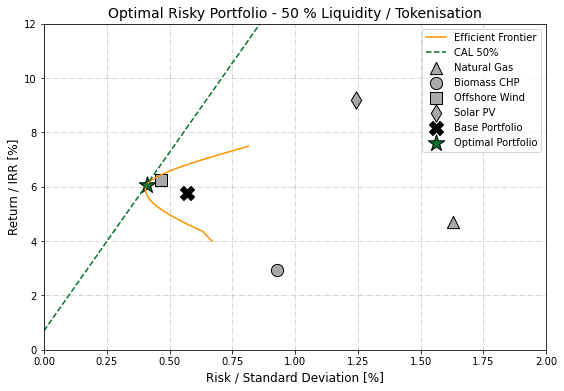

In [ ]:
# Plotting of All Liquidity Limits as well as initial portfolio.
plt.figure(figsize = (9,6))

# Assets
marker_size = 150
plt.scatter(gas_std, gas_mean, facecolors = "darkgrey", edgecolors = "black", s = marker_size, marker = "^", label = "Natural Gas")
plt.scatter(bio_std, bio_mean, facecolors = "darkgrey", edgecolors = "black", s = marker_size, marker = "o", label = "Biomass CHP")
plt.scatter(wind_std, wind_mean, facecolors = "darkgrey", edgecolors = "black", s = marker_size, marker = "s", label = "Offshore Wind")
plt.scatter(solar_std, solar_mean, facecolors = "darkgrey", edgecolors = "black", s = marker_size, marker = "d", label = "Solar PV")

# Efficient Frontier
plt.plot(risk_return2["Risk"], risk_return2["Return"], color = sns.color_palette("autumn")[3], label = "Efficient Frontier")

# Initial Portfolio
base_size = 200
plt.scatter(initial_risk, initial_return, facecolors = "black", edgecolors = "black", s = base_size,marker = "X", color = "grey", label = "Base Portfolio")

# Optimal Portfolios
marker_size = 300
plt.scatter(opt_portfolio2["Risk"],opt_portfolio2["Return"], color = sns.color_palette("Greens")[5], edgecolors = "black", s = marker_size,marker = "*", label = "Optimal Portfolio")

# CAL
x_test = np.linspace(0,1.25, num = 100)
plt.plot(x_test, risk_free + opt_portfolio2["Sharpe"][0]*x_test, linestyle = "--", color = sns.color_palette("Greens")[5], label = "CAL 50%")

# Design
plt.title("Optimal Risky Portfolio - 50 % Liquidity / Tokenisation", size = 14)
plt.grid(color = "black", alpha = 0.2, linestyle = "-.")
plt.legend()
plt.xlabel("Risk / Standard Deviation [%]", size = 12)
plt.ylabel("Return / IRR [%]", size = 12)
plt.xlim((0,2))
plt.ylim((0,12))

plt.savefig("/content/drive/MyDrive/Colab Notebooks/Thesis/Mean-Variance Analysis/Figures/Optimal_Portfolio_50.png", dpi = 300, bbox_inches='tight')

#### Optimal Portfolio - 75 % Liquidity

---

In [ ]:
# Obtain Technologies 
technologies = IRR_results.columns
technologies = [s.replace(' IRR', '') for s in technologies]

####################### Define Sets
Imax = np.shape(IRR_results)[1]

####################### Parameters

# Correlation Matrix
rho_param = rho.to_numpy()

# Covariance Matrix
sigma_param = sigma.to_numpy()

# Return
returns_param = returns.to_numpy()

# Risk-Free Rate
risk_free = 0.7

In [ ]:
####################### Iteration COPY

# Set the return requirement
results_columns = ["Sharpe","Return", "Risk", "Gas Share", "Bio Share", "Wind Share", "Solar Share"]
portfolio_results = pd.DataFrame(data = [] ,columns=results_columns)

####################### Model

model = ConcreteModel()

# Define Sets
model.Iset = range(Imax)
model.Jset = range(Imax)

####################### Variables
#Define variables
model.x = Var(model.Iset,domain = NonNegativeReals)
model.m_return = Var(domain = NonNegativeReals)
model.risk = Var(domain = NonNegativeReals)
model.sharpe = Var(domain = NonNegativeReals)
model.stdev = Var(domain = NonNegativeReals)

####################### Objective Function
#Define objective
model.obj = Objective(expr = model.sharpe, sense = maximize)

####################### Constraints
model.limits = ConstraintList()

# Risk Constraint
model.limits.add(sum(model.x[i]*model.x[j]*sigma_param[0,i]*sigma_param[0,j]*rho_param[i,j] for i in model.Iset for j in model.Jset) == model.risk**2)

# Performance Constraint
model.limits.add(sum(model.x[i]*returns_param[0,i] for i in model.Iset) == model.m_return)

###### CONSTRAIN SOLUTION SPACE SO THAT THE SOLVER CAN FIND THE PROPER OPTIMAL SOLUTION - OTHERWISE YOU WILL NOT GET IT!
model.limits.add(5.75 <= model.m_return)

# Budget Constraint
model.limits.add(sum(model.x[i] for i in model.Iset) == 1)

# Tokenisation Constraints
for i in model.Iset:
  model.limits.add(model.x[i] >= 0.0625)


# Sharpe Constraint
model.limits.add(np.divide((model.m_return-risk_free),model.risk) == model.sharpe)


############## Solver
SolverFactory('ipopt', executable='/content/ipopt').solve(model).write()


######################### Outputs and Results

print("Objective:",value(model.obj))
print("Sharpe Ratio:", value(model.sharpe))
##### Report Asset Shares
asset_shares = []

for m in model.Iset:
 asset_shares.append(value(model.x[m]))

#### Create Results DataFrame
portfolio_return = value(model.m_return)
portfolio_risk = value(model.risk)
portfolio_sharpe = value(model.sharpe)

output = pd.DataFrame(data = [[portfolio_sharpe, portfolio_return,portfolio_risk, *asset_shares]] ,columns=results_columns)

portfolio_results = portfolio_results.append(output)
portfolio_results.reset_index(inplace = True)
portfolio_results.drop(["index"], axis = 1, inplace = True)
print("HI")

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 9
  Number of variables: 7
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.12.13\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.06396269798278809
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
Objecti

In [ ]:
opt_portfolio3 = portfolio_results
opt_portfolio3

,Sharpe,Return,Risk,Gas Share,Bio Share,Wind Share,Solar Share
0,14.077646,6.380276,0.403496,0.0625,0.068914,0.711377,0.157209


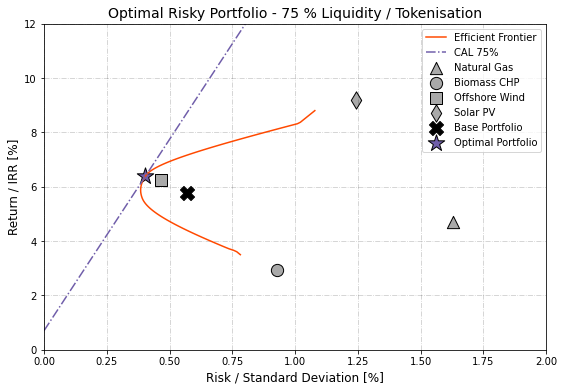

In [ ]:
# Plotting of All Liquidity Limits as well as initial portfolio.
plt.figure(figsize = (9,6))

# Assets
marker_size = 150
plt.scatter(gas_std, gas_mean, facecolors = "darkgrey", edgecolors = "black", s = marker_size, marker = "^", label = "Natural Gas")
plt.scatter(bio_std, bio_mean, facecolors = "darkgrey", edgecolors = "black", s = marker_size, marker = "o", label = "Biomass CHP")
plt.scatter(wind_std, wind_mean, facecolors = "darkgrey", edgecolors = "black", s = marker_size, marker = "s", label = "Offshore Wind")
plt.scatter(solar_std, solar_mean, facecolors = "darkgrey", edgecolors = "black", s = marker_size, marker = "d", label = "Solar PV")

# Efficient Frontier
plt.plot(risk_return3["Risk"], risk_return3["Return"], color = sns.color_palette("autumn")[1], label = "Efficient Frontier")

# Initial Portfolio
base_size = 200
plt.scatter(initial_risk, initial_return, facecolors = "black", edgecolors = "black", s = base_size,marker = "X", color = "grey", label = "Base Portfolio")

# Optimal Portfolios
marker_size = 300
plt.scatter(opt_portfolio3["Risk"],opt_portfolio3["Return"], color = sns.color_palette("Purples")[4], edgecolors = "black",s = marker_size,marker = "*", label = "Optimal Portfolio")

# CAL
x_test = np.linspace(0,1.25, num = 100)
plt.plot(x_test, risk_free + opt_portfolio3["Sharpe"][0]*x_test, linestyle = "-.",color = sns.color_palette("Purples")[4], label = "CAL 75%")


# Design
plt.title("Optimal Risky Portfolio - 75 % Liquidity / Tokenisation", size = 14)
plt.grid(color = "black", alpha = 0.2, linestyle = "-.")
plt.legend()
plt.xlabel("Risk / Standard Deviation [%]", size = 12)
plt.ylabel("Return / IRR [%]", size = 12)
plt.xlim((0,2))
plt.ylim((0,12))

plt.savefig("/content/drive/MyDrive/Colab Notebooks/Thesis/Mean-Variance Analysis/Figures/Optimal_Portfolio_75.png", dpi = 300, bbox_inches='tight')

#### Optimal Portfolio - 100 % Liquidity

---

In [ ]:
# Obtain Technologies 
technologies = IRR_results.columns
technologies = [s.replace(' IRR', '') for s in technologies]

####################### Define Sets
Imax = np.shape(IRR_results)[1]

####################### Parameters

# Correlation Matrix
rho_param = rho.to_numpy()

# Covariance Matrix
sigma_param = sigma.to_numpy()

# Return
returns_param = returns.to_numpy()

# Risk-Free Rate
risk_free = 0.7

In [ ]:
####################### Iteration COPY

# Set the return requirement
results_columns = ["Sharpe","Return", "Risk", "Gas Share", "Bio Share", "Wind Share", "Solar Share"]
portfolio_results = pd.DataFrame(data = [] ,columns=results_columns)

####################### Model

model = ConcreteModel()

# Define Sets
model.Iset = range(Imax)
model.Jset = range(Imax)

####################### Variables
#Define variables
model.x = Var(model.Iset,domain = NonNegativeReals)
model.m_return = Var(domain = NonNegativeReals)
model.risk = Var(domain = NonNegativeReals)
model.sharpe = Var(domain = NonNegativeReals)
model.stdev = Var(domain = NonNegativeReals)

####################### Objective Function
#Define objective
model.obj = Objective(expr = model.sharpe, sense = maximize)

####################### Constraints
model.limits = ConstraintList()

# Risk Constraint
model.limits.add(sum(model.x[i]*model.x[j]*sigma_param[0,i]*sigma_param[0,j]*rho_param[i,j] for i in model.Iset for j in model.Jset) == model.risk**2)

# Performance Constraint
model.limits.add(sum(model.x[i]*returns_param[0,i] for i in model.Iset) == model.m_return)

###### CONSTRAIN SOLUTION SPACE SO THAT THE SOLVER CAN FIND THE PROPER OPTIMAL SOLUTION - OTHERWISE YOU WILL NOT GET IT!
model.limits.add(6.1 <= model.m_return)


# Budget Constraint
model.limits.add(sum(model.x[i] for i in model.Iset) == 1)

# Sharpe Constraint
model.limits.add(np.divide((model.m_return-risk_free),model.risk) == model.sharpe)


############## Solver
SolverFactory('ipopt', executable='/content/ipopt').solve(model).write()


######################### Outputs and Results

print("Objective:",value(model.obj))
print("Sharpe Ratio:", value(model.sharpe))
##### Report Asset Shares
asset_shares = []

for m in model.Iset:
 asset_shares.append(value(model.x[m]))

#### Create Results DataFrame
portfolio_return = value(model.m_return)
portfolio_risk = value(model.risk)
portfolio_sharpe = value(model.sharpe)

output = pd.DataFrame(data = [[portfolio_sharpe, portfolio_return,portfolio_risk, *asset_shares]] ,columns=results_columns)

portfolio_results = portfolio_results.append(output)
portfolio_results.reset_index(inplace = True)
portfolio_results.drop(["index"], axis = 1, inplace = True)
print("HI")

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 5
  Number of variables: 7
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.12.13\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.10020303726196289
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
Objecti

In [ ]:
opt_portfolio4 = portfolio_results
opt_portfolio4

,Sharpe,Return,Risk,Gas Share,Bio Share,Wind Share,Solar Share
0,14.120222,6.402052,0.403822,0.043813,0.072335,0.725117,0.158735


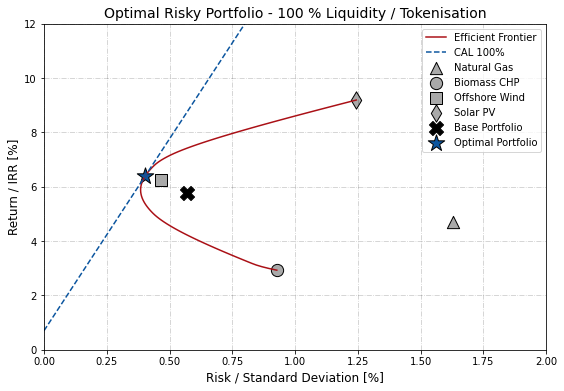

In [ ]:
# Plotting of All Liquidity Limits as well as initial portfolio.
plt.figure(figsize = (9,6))

# Assets
marker_size = 150
plt.scatter(gas_std, gas_mean, facecolors = "darkgrey", edgecolors = "black", s = marker_size, marker = "^", label = "Natural Gas")
plt.scatter(bio_std, bio_mean, facecolors = "darkgrey", edgecolors = "black", s = marker_size, marker = "o", label = "Biomass CHP")
plt.scatter(wind_std, wind_mean, facecolors = "darkgrey", edgecolors = "black", s = marker_size, marker = "s", label = "Offshore Wind")
plt.scatter(solar_std, solar_mean, facecolors = "darkgrey", edgecolors = "black", s = marker_size, marker = "d", label = "Solar PV")

# Efficient Frontier
plt.plot(risk_return4["Risk"], risk_return4["Return"], color = sns.color_palette("Reds")[5],label = "Efficient Frontier")

# Initial Portfolio
base_size = 200
plt.scatter(initial_risk, initial_return, facecolors = "black", edgecolors = "black", s = base_size,marker = "X", color = "grey", label = "Base Portfolio")

# Optimal Portfolios
marker_size = 300
plt.scatter(opt_portfolio4["Risk"],opt_portfolio4["Return"], color = sns.color_palette("Blues")[5], edgecolors = "black",s = marker_size,marker = "*", label = "Optimal Portfolio")

# CAL
x_test = np.linspace(0,1.25, num = 100)
plt.plot(x_test, risk_free + opt_portfolio4["Sharpe"][0]*x_test, linestyle = "--", color = sns.color_palette("Blues")[5], label = "CAL 100%")


# Design
plt.title("Optimal Risky Portfolio - 100 % Liquidity / Tokenisation", size = 14)
plt.grid(color = "black", alpha = 0.2, linestyle = "-.")
plt.legend()
plt.xlabel("Risk / Standard Deviation [%]", size = 12)
plt.ylabel("Return / IRR [%]", size = 12)
plt.xlim((0,2))
plt.ylim((0,12))

plt.savefig("/content/drive/MyDrive/Colab Notebooks/Thesis/Mean-Variance Analysis/Figures/Optimal_Portfolio_100.png", dpi = 300, bbox_inches='tight')

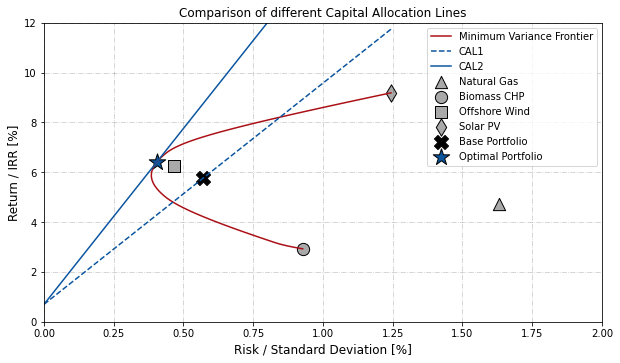

In [ ]:
##### Plotting for Thesis

# Plotting of All Liquidity Limits as well as initial portfolio.
plt.figure(figsize = (10,5.5))

# Assets
marker_size = 150
plt.scatter(gas_std, gas_mean, facecolors = "darkgrey", edgecolors = "black", s = marker_size, marker = "^", label = "Natural Gas")
plt.scatter(bio_std, bio_mean, facecolors = "darkgrey", edgecolors = "black", s = marker_size, marker = "o", label = "Biomass CHP")
plt.scatter(wind_std, wind_mean, facecolors = "darkgrey", edgecolors = "black", s = marker_size, marker = "s", label = "Offshore Wind")
plt.scatter(solar_std, solar_mean, facecolors = "darkgrey", edgecolors = "black", s = marker_size, marker = "d", label = "Solar PV")

# Efficient Frontier
plt.plot(risk_return4["Risk"], risk_return4["Return"], color = sns.color_palette("Reds")[5],label = "Minimum Variance Frontier")

# Initial Portfolio
base_size = 200
plt.scatter(initial_risk, initial_return, facecolors = "black", edgecolors = "black", s = base_size,marker = "X", color = "grey", label = "Base Portfolio")

# Optimal Portfolios
marker_size = 300
plt.scatter(opt_portfolio4["Risk"],opt_portfolio4["Return"], color = sns.color_palette("Blues")[5], edgecolors = "black",s = marker_size,marker = "*", label = "Optimal Portfolio")

# CAL1
x_test = np.linspace(0,1.25, num = 100)
plt.plot(x_test, risk_free + initial_portfolio["Sharpe"][0]*x_test, linestyle = "--", color = sns.color_palette("Blues")[5], label = "CAL1")


# CAL2
x_test = np.linspace(0,1.25, num = 100)
plt.plot(x_test, risk_free + opt_portfolio4["Sharpe"][0]*x_test, color = sns.color_palette("Blues")[5], label = "CAL2")


# Design
plt.title("Comparison of different Capital Allocation Lines")
plt.grid(color = "black", alpha = 0.2, linestyle = "-.")
plt.legend()
plt.xlabel("Risk / Standard Deviation [%]", size = 12)
plt.ylabel("Return / IRR [%]", size = 12)
plt.xlim((0,2))
plt.ylim((0,12))

plt.savefig("/content/drive/MyDrive/Colab Notebooks/Thesis/Mean-Variance Analysis/Figures/Efficient_Frontier_CAL.png", dpi = 300, bbox_inches='tight')

In [ ]:
initial_portfolio["Sharpe"][0]

8.879330023915253

#### Comparison of Results

---



In [ ]:
all_portfolios = pd.concat([initial_portfolio, opt_portfolio1, opt_portfolio2, opt_portfolio3, opt_portfolio4], axis = 0)
all_portfolios.reset_index(inplace = True)
all_portfolios.rename(index = {0: "Base Portfolio", 1: "25% Scenario", 2: "50% Scenario", 3: "75% Scenario", 4: "100% Scenario"}, inplace = True)
all_portfolios.drop('index', axis = 1, inplace = True)
all_portfolios.iloc[:,3:7] = all_portfolios.iloc[:,3:7]*100
all_portfolios

,Sharpe,Return,Risk,Gas Share,Bio Share,Wind Share,Solar Share
Base Portfolio,8.879330,5.767225,0.570677,25.000000,25.000000,25.000000,25.000000
25% Scenario,11.107925,5.885560,0.466834,18.749999,18.749999,43.750003,18.749999
50% Scenario,13.129651,6.071947,0.409146,12.499999,12.499999,60.192260,14.807742
75% Scenario,14.077646,6.380276,0.403496,6.249999,6.891382,71.137725,15.720894
100% Scenario,14.120222,6.402052,0.403822,4.381290,7.233520,72.511669,15.873521


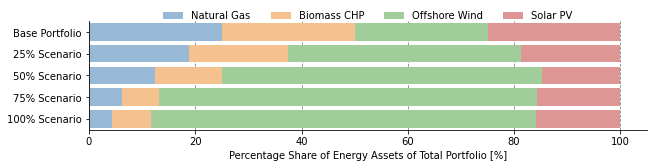

In [ ]:
fields = list(all_portfolios.columns)[3:7]
labels = ['Natural Gas', 'Biomass CHP', 'Offshore Wind', 'Solar PV']
colors = ['#97B9D6', '#F5C18E', '#A1CD9A', '#DE9695']

left = len(all_portfolios) * [0]

# figure and axis
fig, ax = plt.subplots(1, figsize=(10, 2))
for idx, name in enumerate(fields):
    plt.barh(all_portfolios.index, all_portfolios[name], left = left, color=colors[idx])
    left = left + all_portfolios[name]

# title, legend, labels
#plt.title('Portfolio Compositions under Different Tokenisation Scenarios') #         , loc='left'
plt.legend(labels, bbox_to_anchor=([0.5,1.05, 0, 0]), loc = 'center', ncol=4, frameon=False)
plt.xlabel('Percentage Share of Energy Assets of Total Portfolio [%]')
# remove spines
ax.spines['right'].set_visible(False)
#ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
# adjust limits and draw grid lines
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')
plt.gca().invert_yaxis()

plt.savefig("/content/drive/MyDrive/Colab Notebooks/Thesis/Mean-Variance Analysis/Figures/Asset_Shares_Barplot.png", dpi = 300, bbox_inches='tight')

In [ ]:
list(all_portfolios.index)

['Base Portfolio',
 '25% Scenario',
 '50% Scenario',
 '75% Scenario',
 '100% Scenario']

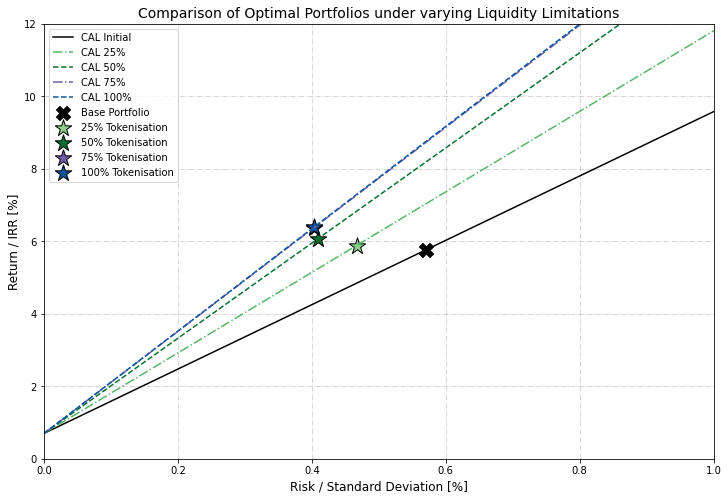

In [ ]:
# Comparison of Optimal Portfolios
plt.figure(figsize = (12,8))

# Initial Portfolio
base_size = 200
plt.scatter(initial_risk, initial_return, facecolors = "black", edgecolors = "black", s = base_size,marker = "X", color = "grey", label = "Base Portfolio")

# Optimal Portfolios
marker_size = 300
plt.scatter(opt_portfolio1["Risk"],opt_portfolio1["Return"], color = sns.color_palette("Greens")[2], edgecolors = "black", s = marker_size,marker = "*", label = "25% Tokenisation")
plt.scatter(opt_portfolio2["Risk"],opt_portfolio2["Return"], color = sns.color_palette("Greens")[5], edgecolors = "black", s = marker_size,marker = "*", label = "50% Tokenisation")
plt.scatter(opt_portfolio3["Risk"],opt_portfolio3["Return"], color = sns.color_palette("Purples")[4], edgecolors = "black",s = marker_size,marker = "*", label = "75% Tokenisation")
plt.scatter(opt_portfolio4["Risk"],opt_portfolio4["Return"], color = sns.color_palette("Blues")[5], edgecolors = "black",s = marker_size,marker = "*", label = "100% Tokenisation")

# CAL
x_test = np.linspace(0,1.25, num = 100)
plt.plot(x_test, risk_free + initial_portfolio["Sharpe"][0]*x_test, color = 'black', label = "CAL Initial")
plt.plot(x_test, risk_free + opt_portfolio1["Sharpe"][0]*x_test, linestyle = "-.",color = sns.color_palette("Greens")[3], label = "CAL 25%")
plt.plot(x_test, risk_free + opt_portfolio2["Sharpe"][0]*x_test, linestyle = "--", color = sns.color_palette("Greens")[5], label = "CAL 50%")
plt.plot(x_test, risk_free + opt_portfolio3["Sharpe"][0]*x_test, linestyle = "-.",color = sns.color_palette("Purples")[4], label = "CAL 75%")
plt.plot(x_test, risk_free + opt_portfolio4["Sharpe"][0]*x_test, linestyle = "--", color = sns.color_palette("Blues")[5], label = "CAL 100%")


# Design
plt.title("Comparison of Optimal Portfolios under varying Liquidity Limitations", size = 14)
plt.grid(color = "black", alpha = 0.2, linestyle = "-.")
plt.legend()
plt.xlabel("Risk / Standard Deviation [%]", size = 12)
plt.ylabel("Return / IRR [%]", size = 12)
plt.xlim((0,1))
plt.ylim((0,12))

plt.savefig("/content/drive/MyDrive/Colab Notebooks/Thesis/Mean-Variance Analysis/Figures/Comparison_Optimal_Portfolios.png", dpi = 300, bbox_inches='tight')

In [ ]:
opt_portfolio1["Risk"][0]

0.4668342195594274

#### Optimisation Path under varying Levels of Liquidity

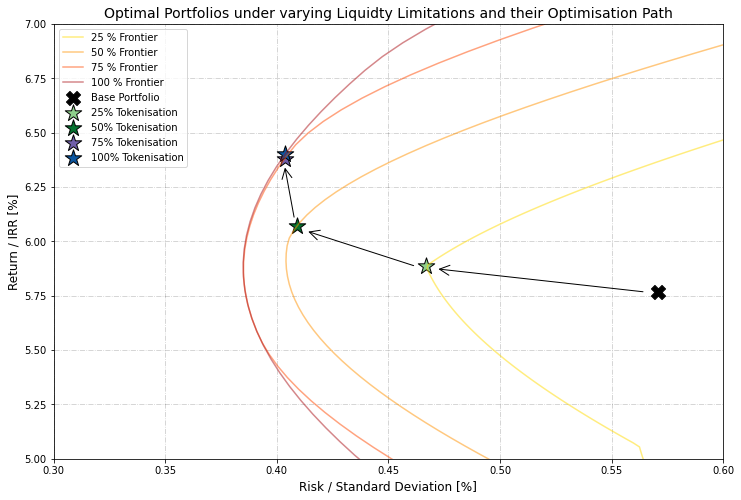

In [ ]:
# Comparison of Optimal Portfolios
plt.figure(figsize = (12,8))

# Initial Portfolio
base_size = 200
plt.scatter(initial_risk, initial_return, facecolors = "black", edgecolors = "black", s = base_size,marker = "X", color = "grey", label = "Base Portfolio")

# Optimal Portfolios
marker_size = 300
plt.scatter(opt_portfolio1["Risk"],opt_portfolio1["Return"], color = sns.color_palette("Greens")[2], edgecolors = "black", s = marker_size,marker = "*", label = "25% Tokenisation")
plt.scatter(opt_portfolio2["Risk"],opt_portfolio2["Return"], color = sns.color_palette("Greens")[5], edgecolors = "black", s = marker_size,marker = "*", label = "50% Tokenisation")
plt.scatter(opt_portfolio3["Risk"],opt_portfolio3["Return"], color = sns.color_palette("Purples")[4], edgecolors = "black",s = marker_size,marker = "*", label = "75% Tokenisation")
plt.scatter(opt_portfolio4["Risk"],opt_portfolio4["Return"], color = sns.color_palette("Blues")[5], edgecolors = "black",s = marker_size,marker = "*", label = "100% Tokenisation")

# Efficient Frontier
plt.plot(risk_return1["Risk"], risk_return1["Return"], color = sns.color_palette("autumn")[5], label = "25 % Frontier", alpha = 0.5)
plt.plot(risk_return2["Risk"], risk_return2["Return"], color = sns.color_palette("autumn")[3], label = "50 % Frontier", alpha = 0.5)
plt.plot(risk_return3["Risk"], risk_return3["Return"], color = sns.color_palette("autumn")[1], label = "75 % Frontier", alpha = 0.5)
plt.plot(risk_return4["Risk"], risk_return4["Return"], color = sns.color_palette("Reds")[5],label = "100 % Frontier", alpha = 0.5)

arrowprops = dict(arrowstyle="<-", color="black", linewidth=1, mutation_scale=25)
plt.annotate('', xy=(0.99*initial_risk, initial_return), 
                 xytext=(1.01*opt_portfolio1["Risk"][0],0.998*opt_portfolio1["Return"][0]), xycoords='data', 
                 textcoords='data', arrowprops=arrowprops)
plt.annotate('', xy=(0.99*opt_portfolio1["Risk"][0],opt_portfolio1["Return"][0]), 
                 xytext=(1.01*opt_portfolio2["Risk"][0],0.996*opt_portfolio2["Return"][0]), xycoords='data', 
                 textcoords='data', arrowprops=arrowprops)
plt.annotate('', xy=(0.997*opt_portfolio2["Risk"][0],1.005*opt_portfolio2["Return"][0]), 
                 xytext=(opt_portfolio3["Risk"][0],0.995*opt_portfolio3["Return"][0]), xycoords='data', 
                 textcoords='data', arrowprops=arrowprops)

# Design
plt.title("Optimal Portfolios under varying Liquidty Limitations and their Optimisation Path", size = 14)
plt.grid(color = "black", alpha = 0.2, linestyle = "-.")
plt.legend()
plt.xlabel("Risk / Standard Deviation [%]", size = 12)
plt.ylabel("Return / IRR [%]", size = 12)
plt.xlim((0.30,0.6))
plt.ylim((5,7))

plt.savefig("/content/drive/MyDrive/Colab Notebooks/Thesis/Mean-Variance Analysis/Figures/Comparison_Optimisation_Path.png", dpi = 300, bbox_inches='tight')

(0.0, 12.0)

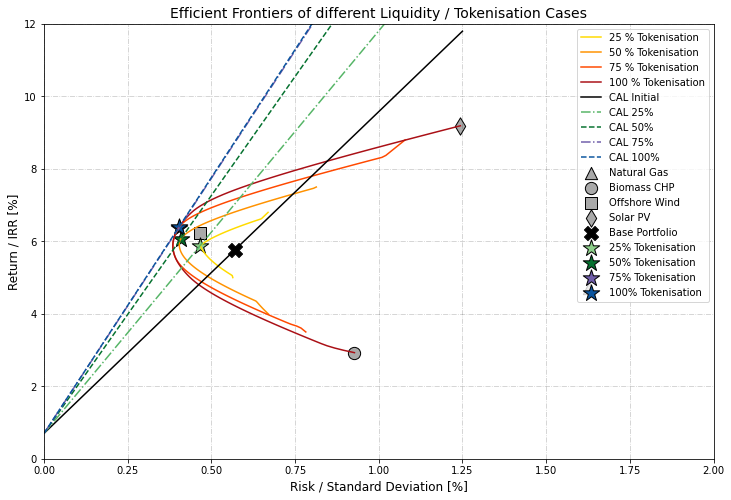

In [ ]:
# Plotting of All Liquidity Limits as well as initial portfolio.
plt.figure(figsize = (12,8))

# Assets
marker_size = 150
plt.scatter(gas_std, gas_mean, facecolors = "darkgrey", edgecolors = "black", s = marker_size, marker = "^", label = "Natural Gas")
plt.scatter(bio_std, bio_mean, facecolors = "darkgrey", edgecolors = "black", s = marker_size, marker = "o", label = "Biomass CHP")
plt.scatter(wind_std, wind_mean, facecolors = "darkgrey", edgecolors = "black", s = marker_size, marker = "s", label = "Offshore Wind")
plt.scatter(solar_std, solar_mean, facecolors = "darkgrey", edgecolors = "black", s = marker_size, marker = "d", label = "Solar PV")

# Efficient Frontier
plt.plot(risk_return1["Risk"], risk_return1["Return"], color = sns.color_palette("autumn")[5], label = "25 % Tokenisation")
plt.plot(risk_return2["Risk"], risk_return2["Return"], color = sns.color_palette("autumn")[3], label = "50 % Tokenisation")
plt.plot(risk_return3["Risk"], risk_return3["Return"], color = sns.color_palette("autumn")[1], label = "75 % Tokenisation")
plt.plot(risk_return4["Risk"], risk_return4["Return"], color = sns.color_palette("Reds")[5],label = "100 % Tokenisation")

# Initial Portfolio
base_size = 200
plt.scatter(initial_risk, initial_return, facecolors = "black", edgecolors = "black", s = base_size,marker = "X", color = "grey", label = "Base Portfolio")

# Optimal Portfolios
marker_size = 300
plt.scatter(opt_portfolio1["Risk"],opt_portfolio1["Return"], color = sns.color_palette("Greens")[2], edgecolors = "black", s = marker_size,marker = "*", label = "25% Tokenisation")
plt.scatter(opt_portfolio2["Risk"],opt_portfolio2["Return"], color = sns.color_palette("Greens")[5], edgecolors = "black", s = marker_size,marker = "*", label = "50% Tokenisation")
plt.scatter(opt_portfolio3["Risk"],opt_portfolio3["Return"], color = sns.color_palette("Purples")[4], edgecolors = "black",s = marker_size,marker = "*", label = "75% Tokenisation")
plt.scatter(opt_portfolio4["Risk"],opt_portfolio4["Return"], color = sns.color_palette("Blues")[5], edgecolors = "black",s = marker_size,marker = "*", label = "100% Tokenisation")

# CAL
x_test = np.linspace(0,1.25, num = 100)
plt.plot(x_test, risk_free + initial_portfolio["Sharpe"][0]*x_test, color = 'black', label = "CAL Initial")
plt.plot(x_test, risk_free + opt_portfolio1["Sharpe"][0]*x_test, linestyle = "-.",color = sns.color_palette("Greens")[3], label = "CAL 25%")
plt.plot(x_test, risk_free + opt_portfolio2["Sharpe"][0]*x_test, linestyle = "--", color = sns.color_palette("Greens")[5], label = "CAL 50%")
plt.plot(x_test, risk_free + opt_portfolio3["Sharpe"][0]*x_test, linestyle = "-.",color = sns.color_palette("Purples")[4], label = "CAL 75%")
plt.plot(x_test, risk_free + opt_portfolio4["Sharpe"][0]*x_test, linestyle = "--", color = sns.color_palette("Blues")[5], label = "CAL 100%")


# Design
plt.title("Efficient Frontiers of different Liquidity / Tokenisation Cases", size = 14)
plt.grid(color = "black", alpha = 0.2, linestyle = "-.")
plt.legend()
plt.xlabel("Risk / Standard Deviation [%]", size = 12)
plt.ylabel("Return / IRR [%]", size = 12)
plt.xlim((0,2))
plt.ylim((0,12))


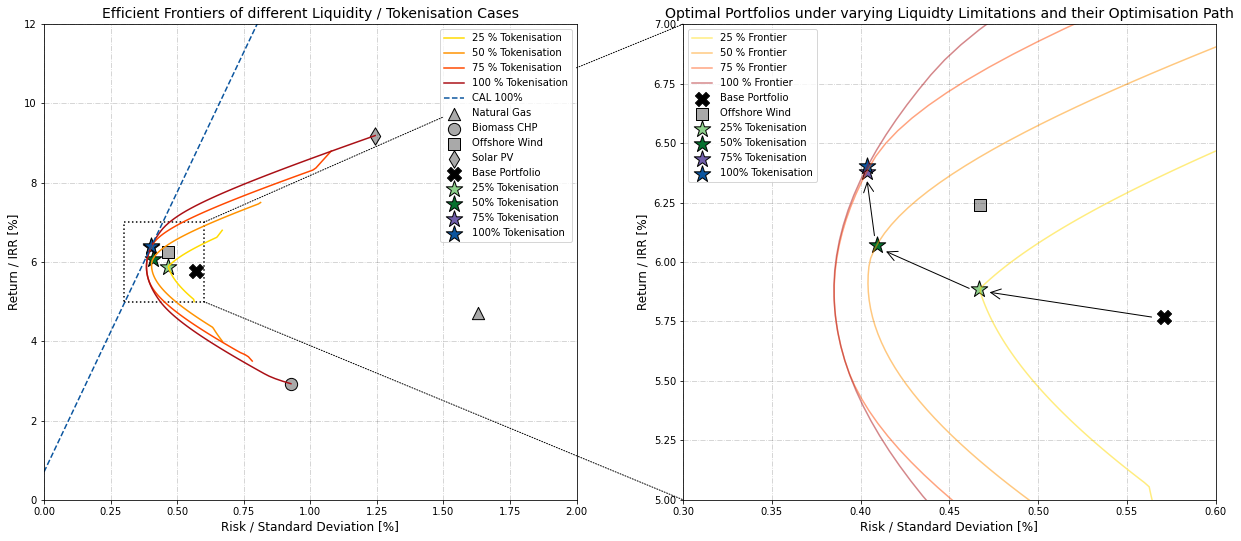

In [ ]:
fig = plt.figure(figsize = (21, 8.75))
ax1 = fig.add_subplot(121)
# Plotting of All Liquidity Limits as well as initial portfolio.

# Assets
marker_size = 150
ax1.scatter(gas_std, gas_mean, facecolors = "darkgrey", edgecolors = "black", s = marker_size, marker = "^", label = "Natural Gas")
ax1.scatter(bio_std, bio_mean, facecolors = "darkgrey", edgecolors = "black", s = marker_size, marker = "o", label = "Biomass CHP")
ax1.scatter(wind_std, wind_mean, facecolors = "darkgrey", edgecolors = "black", s = marker_size, marker = "s", label = "Offshore Wind")
ax1.scatter(solar_std, solar_mean, facecolors = "darkgrey", edgecolors = "black", s = marker_size, marker = "d", label = "Solar PV")

# Efficient Frontier
ax1.plot(risk_return1["Risk"], risk_return1["Return"], color = sns.color_palette("autumn")[5], label = "25 % Tokenisation")
ax1.plot(risk_return2["Risk"], risk_return2["Return"], color = sns.color_palette("autumn")[3], label = "50 % Tokenisation")
ax1.plot(risk_return3["Risk"], risk_return3["Return"], color = sns.color_palette("autumn")[1], label = "75 % Tokenisation")
ax1.plot(risk_return4["Risk"], risk_return4["Return"], color = sns.color_palette("Reds")[5],label = "100 % Tokenisation")

# Initial Portfolio
base_size = 200
ax1.scatter(initial_risk, initial_return, facecolors = "black", edgecolors = "black", s = base_size,marker = "X", color = "grey", label = "Base Portfolio")

# Optimal Portfolios
marker_size = 300
ax1.scatter(opt_portfolio1["Risk"],opt_portfolio1["Return"], color = sns.color_palette("Greens")[2], edgecolors = "black", s = marker_size,marker = "*", label = "25% Tokenisation")
ax1.scatter(opt_portfolio2["Risk"],opt_portfolio2["Return"], color = sns.color_palette("Greens")[5], edgecolors = "black", s = marker_size,marker = "*", label = "50% Tokenisation")
ax1.scatter(opt_portfolio3["Risk"],opt_portfolio3["Return"], color = sns.color_palette("Purples")[4], edgecolors = "black",s = marker_size,marker = "*", label = "75% Tokenisation")
ax1.scatter(opt_portfolio4["Risk"],opt_portfolio4["Return"], color = sns.color_palette("Blues")[5], edgecolors = "black",s = marker_size,marker = "*", label = "100% Tokenisation")

# CAL
x_test = np.linspace(0,1.25, num = 100)
ax1.plot(x_test, risk_free + opt_portfolio4["Sharpe"][0]*x_test, linestyle = "--", color = sns.color_palette("Blues")[5], label = "CAL 100%")


# Design
ax1.set_title("Efficient Frontiers of different Liquidity / Tokenisation Cases", size = 14)
ax1.grid(color = "black", alpha = 0.2, linestyle = "-.")
ax1.legend()
ax1.set_xlabel("Risk / Standard Deviation [%]", size = 12)
ax1.set_ylabel("Return / IRR [%]", size = 12)
ax1.set_xlim((0,2))
ax1.set_ylim((0,12))


##########################################
ax2 = fig.add_subplot(122)
# Comparison of Optimal Portfolios


# Initial Portfolio
base_size = 200
ax2.scatter(initial_risk, initial_return, facecolors = "black", edgecolors = "black", s = base_size,marker = "X", color = "grey", label = "Base Portfolio")

marker_size = 150
# Wind Asset
ax2.scatter(wind_std, wind_mean, facecolors = "darkgrey", edgecolors = "black", s = marker_size, marker = "s", label = "Offshore Wind")

# Optimal Portfolios
marker_size = 300
ax2.scatter(opt_portfolio1["Risk"],opt_portfolio1["Return"], color = sns.color_palette("Greens")[2], edgecolors = "black", s = marker_size,marker = "*", label = "25% Tokenisation")
ax2.scatter(opt_portfolio2["Risk"],opt_portfolio2["Return"], color = sns.color_palette("Greens")[5], edgecolors = "black", s = marker_size,marker = "*", label = "50% Tokenisation")
ax2.scatter(opt_portfolio3["Risk"],opt_portfolio3["Return"], color = sns.color_palette("Purples")[4], edgecolors = "black",s = marker_size,marker = "*", label = "75% Tokenisation")
ax2.scatter(opt_portfolio4["Risk"],opt_portfolio4["Return"], color = sns.color_palette("Blues")[5], edgecolors = "black",s = marker_size,marker = "*", label = "100% Tokenisation")

# Efficient Frontier
ax2.plot(risk_return1["Risk"], risk_return1["Return"], color = sns.color_palette("autumn")[5], label = "25 % Frontier", alpha = 0.5)
ax2.plot(risk_return2["Risk"], risk_return2["Return"], color = sns.color_palette("autumn")[3], label = "50 % Frontier", alpha = 0.5)
ax2.plot(risk_return3["Risk"], risk_return3["Return"], color = sns.color_palette("autumn")[1], label = "75 % Frontier", alpha = 0.5)
ax2.plot(risk_return4["Risk"], risk_return4["Return"], color = sns.color_palette("Reds")[5],label = "100 % Frontier", alpha = 0.5)

arrowprops = dict(arrowstyle="<-", color="black", linewidth=1, mutation_scale=25)
ax2.annotate('', xy=(0.99*initial_risk, initial_return), 
                 xytext=(1.01*opt_portfolio1["Risk"][0],0.998*opt_portfolio1["Return"][0]), xycoords='data', 
                 textcoords='data', arrowprops=arrowprops)
ax2.annotate('', xy=(0.99*opt_portfolio1["Risk"][0],opt_portfolio1["Return"][0]), 
                 xytext=(1.01*opt_portfolio2["Risk"][0],0.996*opt_portfolio2["Return"][0]), xycoords='data', 
                 textcoords='data', arrowprops=arrowprops)
ax2.annotate('', xy=(0.997*opt_portfolio2["Risk"][0],1.005*opt_portfolio2["Return"][0]), 
                 xytext=(opt_portfolio3["Risk"][0],0.995*opt_portfolio3["Return"][0]), xycoords='data', 
                 textcoords='data', arrowprops=arrowprops)


# Design
ax2.set_title("Optimal Portfolios under varying Liquidty Limitations and their Optimisation Path", size = 14)
ax2.grid(color = "black", alpha = 0.2, linestyle = "-.")
ax2.legend()
ax2.set_xlabel("Risk / Standard Deviation [%]", size = 12)
ax2.set_ylabel("Return / IRR [%]", size = 12)
ax2.set_xlim((0.30,0.6))
ax2.set_ylim((5,7))

### Zoom Effect on Plots
con1 = ConnectionPatch(xyA=(0.6, 5), coordsA=ax1.transData, 
                       xyB=(0.3, 5), coordsB=ax2.transData, color = 'black', linestyle = ":")
fig.add_artist(con1)

### Zoom Effect on Plots
#con2 = ConnectionPatch(xyA=(0.6, 7), coordsA=ax1.transData, 
                       #xyB=(0.3, 7), coordsB=ax2.transData, color = 'black', linestyle = ":", zorder=1)
#fig.add_artist(con2)

### Zoom Effect on Plots
con3 = ConnectionPatch(xyA=(0.6, 7), coordsA=ax1.transData, 
                       xyB=(1.50, 9.66), coordsB=ax1.transData, color = 'black', linestyle = ":", zorder=1)
fig.add_artist(con3)

### Zoom Effect on Plots
con4 = ConnectionPatch(xyA=(2, 10.9), coordsA=ax1.transData, 
                       xyB=(0.3, 7), coordsB=ax2.transData, color = 'black', linestyle = ":", zorder=1)
fig.add_artist(con4)

## Focus Rectangle
rect = patches.Rectangle((0.3, 5), 0.3, 2, linewidth=1.5, linestyle = ":", edgecolor='black', facecolor='none')

# Add the patch to the Axes
ax1.add_patch(rect)

plt.savefig("/content/drive/MyDrive/Colab Notebooks/Thesis/Mean-Variance Analysis/Figures/Zoom_Plot.png", dpi = 300, bbox_inches='tight')

### Portfolio and Efficient Frontier Comparison

---

In this section, all efficient frontiers as well as portfolios are compared. 

### Sustainability Criteria

---

In [ ]:
# Obtain Technologies 
technologies = IRR_results.columns
technologies = [s.replace(' IRR', '') for s in technologies]

####################### Define Sets
Imax = np.shape(IRR_results)[1]

####################### Parameters

# Correlation Matrix
rho_param = rho.to_numpy()

# Covariance Matrix
sigma_param = sigma.to_numpy()

# Return
returns_param = returns.to_numpy()

# Risk-Free Rate
risk_free = 0.7

sustainable_binary = [0, 1, 1, 1]

#### 100 % Sustainability - Optimal Portfolio

In [ ]:

####################### Iteration COPY

# Set the return requirement
results_columns = ["Sustainability Share", "Sharpe","Return", "Risk", "Gas Share", "Bio Share", "Wind Share", "Solar Share"]
portfolio_results = pd.DataFrame(data = [] ,columns=results_columns)

sustainability_share = 1
####################### Model

model = ConcreteModel()

# Define Sets
model.Iset = range(Imax)
model.Jset = range(Imax)

####################### Variables
#Define variables
model.x = Var(model.Iset,domain = NonNegativeReals)
model.m_return = Var(domain = NonNegativeReals)
model.risk = Var(domain = NonNegativeReals)
model.sharpe = Var(domain = NonNegativeReals)
model.stdev = Var(domain = NonNegativeReals)
model.sust = Var(domain = NonNegativeReals)


####################### Objective Function
#Define objective
model.obj = Objective(expr = model.sharpe, sense = maximize)

####################### Constraints
model.limits = ConstraintList()

# Risk Constraint
model.limits.add(sum(model.x[i]*model.x[j]*sigma_param[0,i]*sigma_param[0,j]*rho_param[i,j] for i in model.Iset for j in model.Jset) == model.risk**2)

# Performance Constraint
model.limits.add(sum(model.x[i]*returns_param[0,i] for i in model.Iset) == model.m_return)

# Sustainability Constraint
model.limits.add(sum(model.x[i]*sustainable_binary[i] for i in model.Iset) == sustainability_share)

###### CONSTRAIN SOLUTION SPACE SO THAT THE SOLVER CAN FIND THE PROPER OPTIMAL SOLUTION - OTHERWISE YOU WILL NOT GET IT!
model.limits.add(6.3 <= model.m_return)


# Budget Constraint
model.limits.add(sum(model.x[i] for i in model.Iset) == 1)

# Sharpe Constraint
model.limits.add(np.divide((model.m_return-risk_free),model.risk) == model.sharpe)


############## Solver
SolverFactory('ipopt', executable='/content/ipopt').solve(model).write()


######################### Outputs and Results

print("Objective:",value(model.obj))
print("Sharpe Ratio:", value(model.sharpe))
##### Report Asset Shares
asset_shares = []

for m in model.Iset:
 asset_shares.append(value(model.x[m]))

#### Create Results DataFrame
portfolio_return = value(model.m_return)
portfolio_risk = value(model.risk)
portfolio_sharpe = value(model.sharpe)

output = pd.DataFrame(data = [[sustainability_share, portfolio_sharpe, portfolio_return,portfolio_risk, *asset_shares]] ,columns=results_columns)

portfolio_results = portfolio_results.append(output)
portfolio_results.reset_index(inplace = True)
portfolio_results.drop(["index"], axis = 1, inplace = True)
#print("Sustainable Share", value(model.sust))
for i in model.Iset:
  print(asset_shares[i])

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 6
  Number of variables: 7
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.12.13\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.09825778007507324
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
Objecti

In [ ]:
opt_portfolio_100sust = portfolio_results
opt_portfolio_100sust

,Sustainability Share,Sharpe,Return,Risk,Gas Share,Bio Share,Wind Share,Solar Share
0,1,13.897877,6.479119,0.415827,6.261135e-18,0.075216,0.759422,0.165362


#### Varying Shares of Sustainability Share - Optimal Portfolios

In [ ]:
####################### Iteration COPY

# Set the return requirement
results_columns = ["Sustainability Share", "Sharpe","Return", "Risk", "Gas Share", "Bio Share", "Wind Share", "Solar Share"]
portfolio_results = pd.DataFrame(data = [] ,columns=results_columns)

sustainability_share_vector = np.linspace(0,0.9,10)

for i in range(len(sustainability_share_vector)):
  ####################### Model

  model = ConcreteModel()

  # Define Sets
  model.Iset = range(Imax)
  model.Jset = range(Imax)

  ####################### Variables
  #Define variables
  model.x = Var(model.Iset,domain = NonNegativeReals)
  model.m_return = Var(domain = NonNegativeReals)
  model.risk = Var(domain = NonNegativeReals)
  model.sharpe = Var(domain = NonNegativeReals)
  model.stdev = Var(domain = NonNegativeReals)
  model.sust = Var(domain = NonNegativeReals)


  ####################### Objective Function
  #Define objective
  model.obj = Objective(expr = model.sharpe, sense = maximize)

  ####################### Constraints
  model.limits = ConstraintList()

  # Risk Constraint
  model.limits.add(sum(model.x[i]*model.x[j]*sigma_param[0,i]*sigma_param[0,j]*rho_param[i,j] for i in model.Iset for j in model.Jset) == model.risk**2)

  # Performance Constraint
  model.limits.add(sum(model.x[i]*returns_param[0,i] for i in model.Iset) == model.m_return)

  # Sustainability Constraint
  model.limits.add(sum(model.x[i]*sustainable_binary[i] for i in model.Iset) == sustainability_share_vector[i])

  ###### CONSTRAIN SOLUTION SPACE SO THAT THE SOLVER CAN FIND THE PROPER OPTIMAL SOLUTION - OTHERWISE YOU WILL NOT GET IT!
  model.limits.add(4.2 <= model.m_return)


  # Budget Constraint
  model.limits.add(sum(model.x[i] for i in model.Iset) == 1)

  # Sharpe Constraint
  model.limits.add(np.divide((model.m_return-risk_free),model.risk) == model.sharpe)


  ############## Solver
  SolverFactory('ipopt', executable='/content/ipopt').solve(model).write()


  ######################### Outputs and Results

  print("Objective:",value(model.obj))
  print("Sharpe Ratio:", value(model.sharpe))
  ##### Report Asset Shares
  asset_shares = []

  for m in model.Iset:
    asset_shares.append(value(model.x[m]))

  #### Create Results DataFrame
  portfolio_return = value(model.m_return)
  portfolio_risk = value(model.risk)
  portfolio_sharpe = value(model.sharpe)

  output = pd.DataFrame(data = [[sustainability_share_vector[i], portfolio_sharpe, portfolio_return,portfolio_risk, *asset_shares]] ,columns=results_columns)

  portfolio_results = portfolio_results.append(output)
  portfolio_results.reset_index(inplace = True)
  portfolio_results.drop(["index"], axis = 1, inplace = True)
  #print("Sustainable Share", value(model.sust))


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 6
  Number of variables: 7
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.12.13\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.04949545860290527
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
Objecti

In [ ]:
opt_portfolio_sust = portfolio_results
opt_portfolio_sust

,Sustainability Share,Sharpe,Return,Risk,Gas Share,Bio Share,Wind Share,Solar Share
0,0.0,2.460946e+00,4.709808,1.629377e+00,1.000000,0.000000,0.000000e+00,1.944983e-08
1,0.1,3.031987e+00,5.157773,1.470248e+00,0.900000,0.000000,0.000000e+00,1.000000e-01
2,0.2,3.704807e+00,5.605737,1.324154e+00,0.800000,0.000000,0.000000e+00,2.000000e-01
3,0.3,4.476777e+00,6.053702,1.195883e+00,0.700000,0.000000,0.000000e+00,3.000000e-01
4,0.4,5.314175e+00,6.501665,1.091734e+00,0.600000,0.000000,1.905284e-07,3.999998e-01
5,0.5,6.308110e+00,6.383709,9.010162e-01,0.500000,0.000000,1.919099e-01,3.080901e-01
6,0.6,7.680761e+00,6.336236,7.338122e-01,0.400000,0.000000,3.599181e-01,2.400819e-01
7,0.7,9.540944e+00,6.357128,5.929316e-01,0.300000,0.000000,5.047431e-01,1.952569e-01
8,0.8,1.179420e+01,6.434035,4.861742e-01,0.200000,0.001449,6.274955e-01,1.710552e-01
9,0.9,6.841546e+09,2003.010231,2.306082e-07,3.937612,0.022917,2.333312e+02,7.674389e-02


#### Comparison of Results

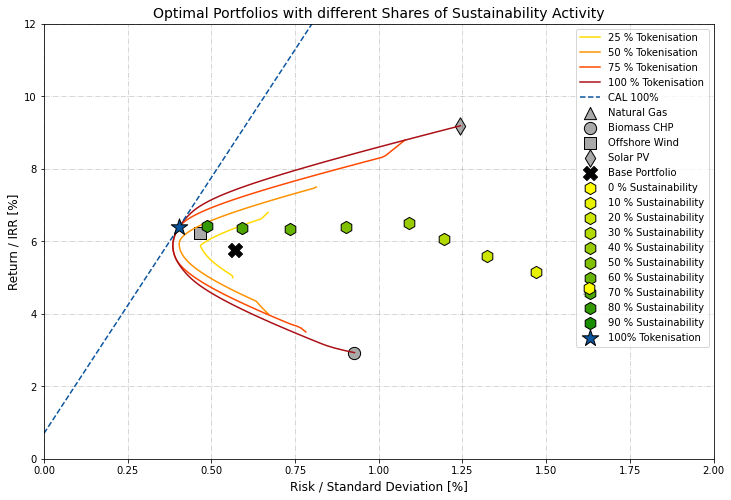

In [ ]:

fig = plt.figure(figsize = (12, 8))
ax1 = fig.add_subplot(111)
# Plotting of All Liquidity Limits as well as initial portfolio.

# Assets
marker_size = 150
ax1.scatter(gas_std, gas_mean, facecolors = "darkgrey", edgecolors = "black", s = marker_size, marker = "^", label = "Natural Gas")
ax1.scatter(bio_std, bio_mean, facecolors = "darkgrey", edgecolors = "black", s = marker_size, marker = "o", label = "Biomass CHP")
ax1.scatter(wind_std, wind_mean, facecolors = "darkgrey", edgecolors = "black", s = marker_size, marker = "s", label = "Offshore Wind")
ax1.scatter(solar_std, solar_mean, facecolors = "darkgrey", edgecolors = "black", s = marker_size, marker = "d", label = "Solar PV")


# Efficient Frontier
ax1.plot(risk_return1["Risk"], risk_return1["Return"], color = sns.color_palette("autumn")[5], label = "25 % Tokenisation")
ax1.plot(risk_return2["Risk"], risk_return2["Return"], color = sns.color_palette("autumn")[3], label = "50 % Tokenisation")
ax1.plot(risk_return3["Risk"], risk_return3["Return"], color = sns.color_palette("autumn")[1], label = "75 % Tokenisation")
ax1.plot(risk_return4["Risk"], risk_return4["Return"], color = sns.color_palette("Reds")[5],label = "100 % Tokenisation")

# Initial Portfolio
base_size = 200
ax1.scatter(initial_risk, initial_return, facecolors = "black", edgecolors = "black", s = base_size,marker = "X", color = "grey", label = "Base Portfolio")

# Sustainable Optimal Portfolios
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

c1='yellow'
c2='green' #green
n_colours = len(opt_portfolio_sust)

for i in range(n_colours):
  plt.scatter(opt_portfolio_sust.iloc[i,3],opt_portfolio_sust.iloc[i,2], color=colorFader(c1,c2,i/n_colours), 
              s = marker_size,marker = "h", edgecolors = "black",  label = str(int(round(opt_portfolio_sust.iloc[i,0],2)*100)) + " % Sustainability", zorder = 20)


# Optimal Portfolios
marker_size = 300
ax1.scatter(opt_portfolio4["Risk"],opt_portfolio4["Return"], color = sns.color_palette("Blues")[5], 
            edgecolors = "black",s = marker_size,marker = "*", label = "100% Tokenisation", zorder = 30)

# CAL
x_test = np.linspace(0,1.25, num = 100)
ax1.plot(x_test, risk_free + opt_portfolio4["Sharpe"][0]*x_test, linestyle = "--", color = sns.color_palette("Blues")[5], label = "CAL 100%")


# Design
ax1.set_title("Optimal Portfolios with different Shares of Sustainability Activity", size = 14)
ax1.grid(color = "black", alpha = 0.2, linestyle = "-.")
ax1.legend()
ax1.set_xlabel("Risk / Standard Deviation [%]", size = 12)
ax1.set_ylabel("Return / IRR [%]", size = 12)
ax1.set_xlim((0,2))
ax1.set_ylim((0,12))

plt.savefig("/content/drive/MyDrive/Colab Notebooks/Thesis/Mean-Variance Analysis/Figures/Sustainable_Portfolios.png", dpi = 300, bbox_inches='tight')